In [10]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.optim as optim
from copy import deepcopy as dc
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from copy import deepcopy as dc
import seaborn as sns

1. Familiarize yourself with the input data sp500_tickers_A-D_1min_1pppix.zip: [1]

In [2]:
# Define the directory path where your data is located
data_dir = '/content/drive/MyDrive/sp500_tickers_A-D_1min_1pppix'

# List the files in the data directory to see the available stock data files
stock_files = os.listdir(data_dir)

# Count the number of stock files in the directory
num_stocks = len(stock_files)
print(f"Number of stocks: {num_stocks}")

print("List of stock data files:")
print(stock_files)

# Let's choose one stock file to familarise ourselves with
sample_stock_file = 'AAPL_1min.txt'

# Define the full path to the sample stock file
sample_stock_file_path = os.path.join(data_dir, sample_stock_file)

# Read and display the content of the sample stock file
with open(sample_stock_file_path, 'r') as file:
    sample_data = file.readlines()

# Display the first few lines of the sample stock file
print("\nSample data from the stock file:")
for line in sample_data[:10]:  # Display the first 5 lines as an example
    print(line.strip())

Number of stocks: 192
List of stock data files:
['AAL_1min.txt', 'AAPL_1min.txt', 'AA_1min.txt', 'AAP_1min.txt', 'ABBV_1min.txt', 'ABT_1min.txt', 'ABC_1min.txt', 'ABMD_1min.txt', 'ACN_1min.txt', 'ACV_1min.txt', 'ADBE_1min.txt', 'ADI_1min.txt', 'ADM_1min.txt', 'ADP_1min.txt', 'ADSK_1min.txt', 'ADT_1min.txt', 'ADS_1min.txt', 'AEE_1min.txt', 'AES_1min.txt', 'AEP_1min.txt', 'AFL_1min.txt', 'AIG_1min.txt', 'AINV_1min.txt', 'AIV_1min.txt', 'AIZ_1min.txt', 'AKAM_1min.txt', 'AJG_1min.txt', 'ALGN_1min.txt', 'ALB_1min.txt', 'ALLE_1min.txt', 'ALK_1min.txt', 'ALL_1min.txt', 'ALTR_1min.txt', 'AMAT_1min.txt', 'AMCR_1min.txt', 'AMBC_1min.txt', 'AMD_1min.txt', 'AME_1min.txt', 'AMGN_1min.txt', 'AMG_1min.txt', 'AMT_1min.txt', 'AMP_1min.txt', 'AMZN_1min.txt', 'ANET_1min.txt', 'ANF_1min.txt', 'ANTM_1min.txt', 'ANSS_1min.txt', 'AN_1min.txt', 'AOS_1min.txt', 'AON_1min.txt', 'APA_1min.txt', 'APH_1min.txt', 'APD_1min.txt', 'APTV_1min.txt', 'ARE_1min.txt', 'ARNC_1min.txt', 'ASO_1min.txt', 'ASH_1min.txt', 'ATGE

a) Plot the minute-by-minute closing price series of few stocks.

The function below will plot the min by min closing price of any stock pased on to it in the given time range.

The funciton takes the stock_symbol as argumnent along with the start and end time stamp between which we are intersted in plotting the closing price.

The data given is minute by minute so it does not require any pre processing

In [ ]:
def min_by_min_closing_plot(stock_symbol, start_timestamp, end_timestamp):
    """
    Plots the minute-by-minute closing price series for a given stock symbol within a specified timestamp range.

    Args:
        stock_symbol (str): The stock symbol for which to plot the closing prices.
        start_timestamp (str): The start timestamp in 'YYYY-MM-DD HH:MM:SS' format.
        end_timestamp (str): The end timestamp in 'YYYY-MM-DD HH:MM:SS' format.
    """
    # Construct the file path based on the stock symbol and data directory
    file_path = os.path.join(data_dir, f"{stock_symbol}_1min.txt")

    # Check if the data file exists
    if not os.path.exists(file_path):
        print(f"Data for {stock_symbol} not found in the dataset.")
        return

    # Load the data for the specified stock
    df = pd.read_csv(file_path, header=None, names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

    # Convert the 'Timestamp' column to a datetime object
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Filter the data for the specified timestamp range
    df = df[(df['Timestamp'] >= pd.to_datetime(start_timestamp)) &
            (df['Timestamp'] <= pd.to_datetime(end_timestamp))]

    # Plot the minute-by-minute closing price series
    plt.figure(figsize=(12, 6))
    plt.plot(df['Timestamp'], df['Close'], label=f'{stock_symbol} Closing Price', linewidth=1)
    plt.title(f'{stock_symbol} Minute-by-Minute Closing Price ({start_timestamp} to {end_timestamp})')
    plt.xlabel('Time')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(False)
    plt.show()


Below is the exammple usage of the above mentioned function being used to plot the minute by minyte closing price of AAPL, AAL, BBBY,

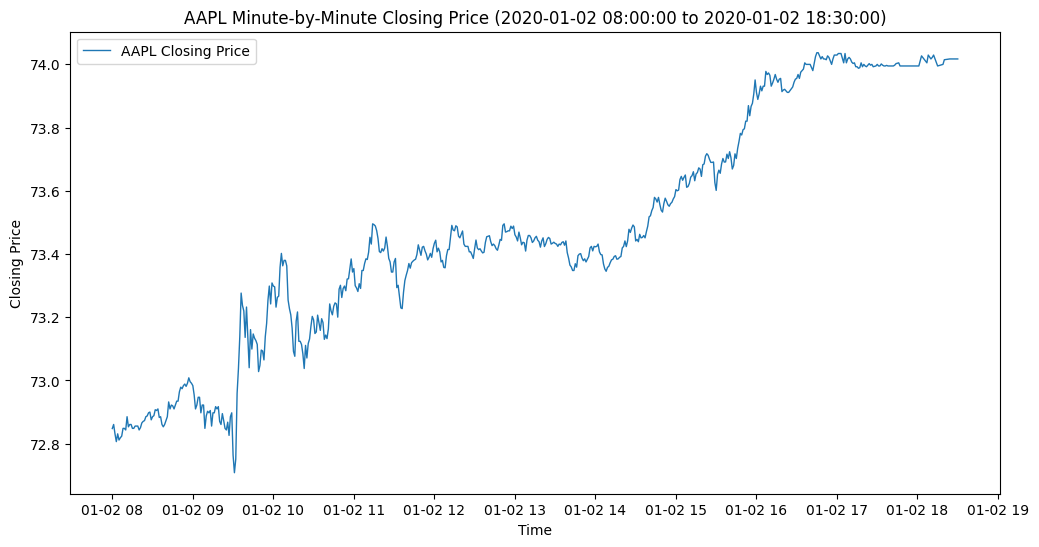

In [ ]:
# Example usage:
min_by_min_closing_plot('AAPL', '2020-01-02 08:00:00', '2020-01-02 18:30:00')

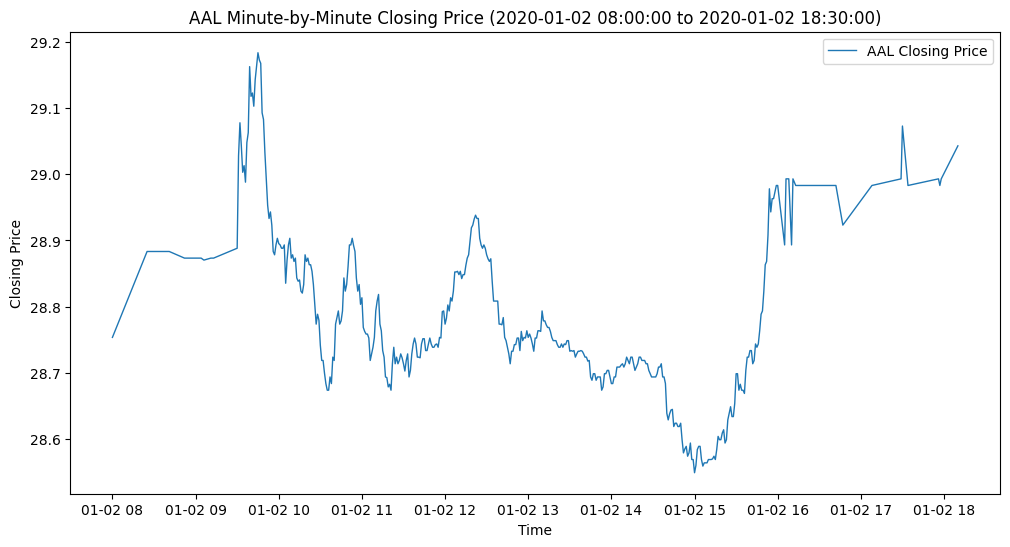

In [6]:
# Example usage:
min_by_min_closing_plot('AAL', '2020-01-02 08:00:00', '2020-01-02 18:30:00')

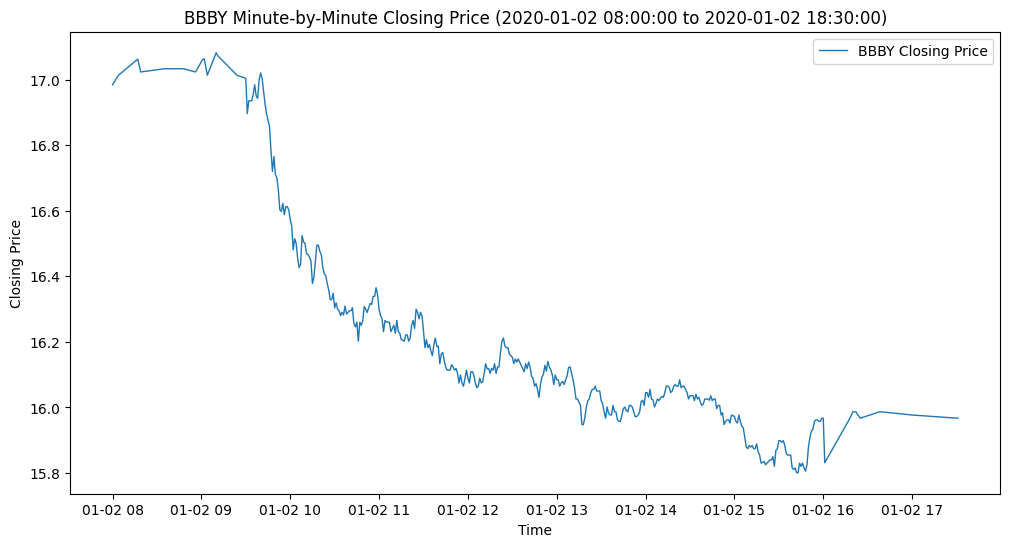

In [7]:
# Example usage:
min_by_min_closing_plot('BBBY', '2020-01-02 08:00:00', '2020-01-02 18:30:00')

In case the information about the particliar stock file is not available in the data, the funciton returns the following.

In [8]:
# Example usage:
min_by_min_closing_plot('BBB', '2020-01-02 08:00:00', '2020-01-02 18:30:00')

Data for BBB not found in the dataset.


b) Plot the day-by-day closing price series of a few stocks

We can similarly also plit the day by day closing price plots for any stock by using the below function.

Since the data that we have is minute by minute, the day by day closing plot can be had by plotting the closing value of the last minute of a day.

In [9]:
def day_by_day_closing_plot(stock_symbol, start_date, end_date):
    """
    Plots the day-by-day closing price series for a given stock symbol within a specified date range.

    Args:
        stock_symbol (str): The stock symbol for which to plot the closing prices.
        start_date (str): The start date in 'YYYY-MM-DD' format.
        end_date (str): The end date in 'YYYY-MM-DD' format.
    """
    # Construct the file path based on the stock symbol and data directory
    file_path = os.path.join(data_dir, f"{stock_symbol}_1min.txt")

    # Check if the data file exists
    if not os.path.exists(file_path):
        print(f"Data for {stock_symbol} not found in the dataset.")
        return

    # Load the data for the specified stock
    df = pd.read_csv(file_path, header=None, names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

    # Convert the 'Timestamp' column to a datetime object
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Filter the data for the specified date range
    df = df[(df['Timestamp'].dt.date >= pd.to_datetime(start_date).date()) &
            (df['Timestamp'].dt.date <= pd.to_datetime(end_date).date())]

    # Aggregate the data to compute the daily closing price (closing price at the end of each day)
    daily_data = df.groupby(df['Timestamp'].dt.date)['Close'].last()

    # Plot the day-by-day closing price series
    plt.figure(figsize=(12, 6))
    plt.plot(daily_data.index, daily_data.values, label=f'{stock_symbol} Closing Price', linewidth=1)
    plt.title(f'{stock_symbol} Day-by-Day Closing Price ({start_date} to {end_date})')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(False)
    plt.show()


Given below is the exmaple usage of how the above function can be sued by passing the syock symbol along with the start and end date between which we are intested in plottting the daily closing price.

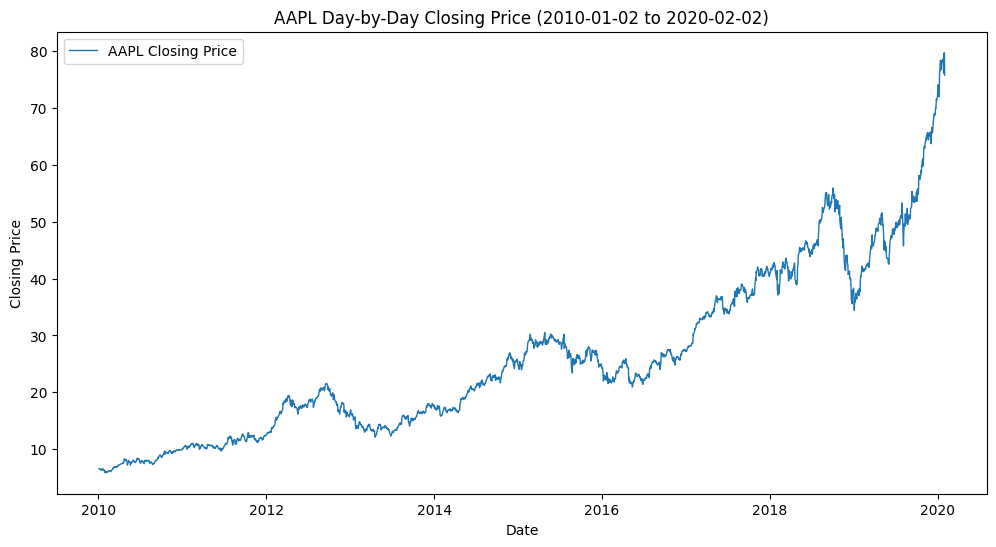

In [10]:
# Example usage:
day_by_day_closing_plot('AAPL', '2010-01-02', '2020-02-02')

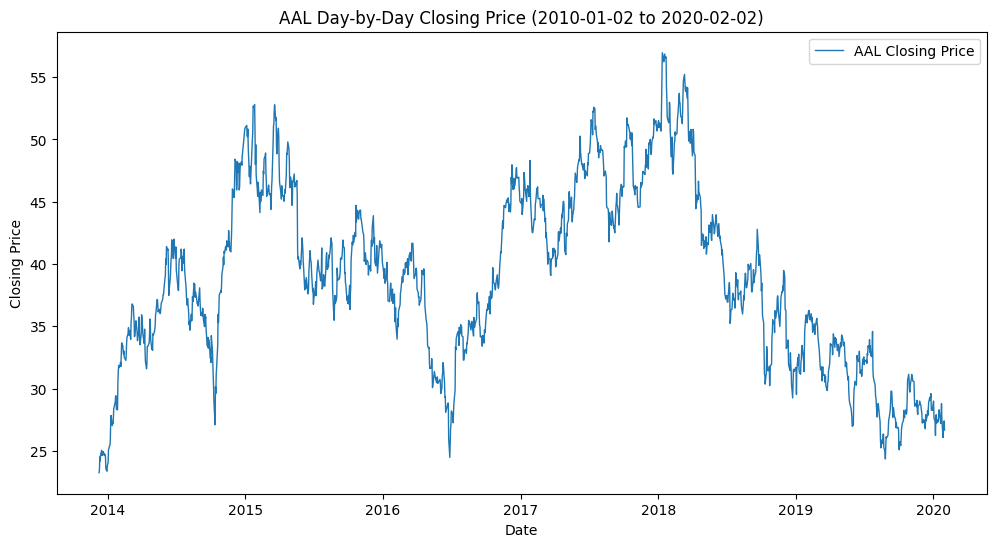

In [11]:
# Example usage:
day_by_day_closing_plot('AAL', '2010-01-02', '2020-02-02')

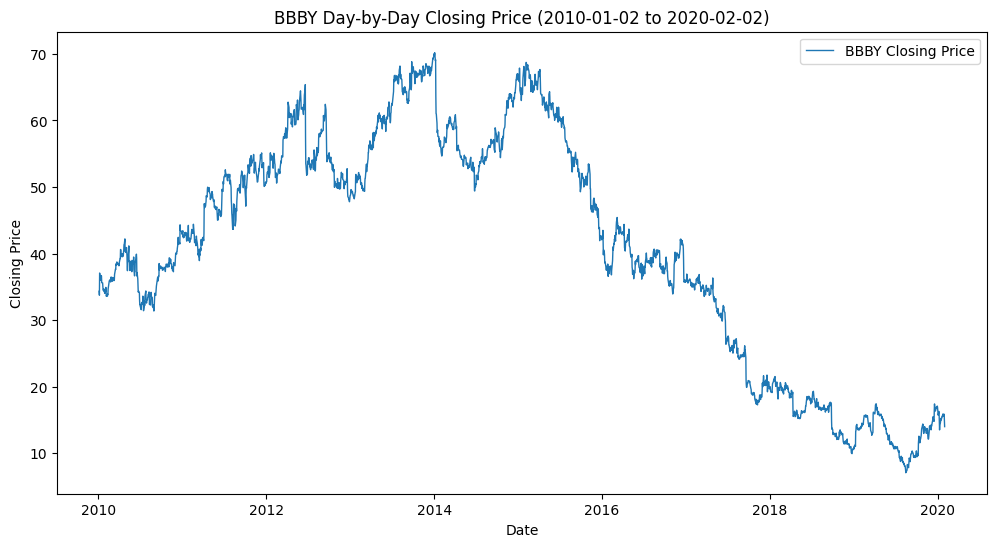

In [12]:
# Example usage:
day_by_day_closing_plot('BBBY', '2010-01-02', '2020-02-02')

Again in case the data is not available about a particular stock, the funcitn gracefully returns the following.

In [13]:
# Example usage:
day_by_day_closing_plot('BBB', '2010-01-02', '2020-02-02')

Data for BBB not found in the dataset.


c) Plot a complete candlestick chart with volume on secondary y-axis for a few stocks with a time period of your choice.

We will be suing plotly to plot the candelstick chart with volume for any given time period.

Sinc ethe data given is minute by minute, the min by min candlesaicks can be plotted by passing the stock symbol and the range ot the fucnitno below.

The volume is aslo plotted on the secondary y axis, with a lighter colour for visibility.


In [14]:
def min_by_min_candlesticks(stock_symbol, start_timestamp, end_timestamp):
    """
    Plots a candlestick chart with volume on a secondary y-axis for a given stock within a specified minute-by-minute timestamp range using Plotly.

    Args:
        stock_symbol (str): The stock symbol for which to plot the candlestick chart.
        start_timestamp (str): The start timestamp in 'YYYY-MM-DD HH:MM:SS' format.
        end_timestamp (str): The end timestamp in 'YYYY-MM-DD HH:MM:SS' format.
    """
    # Construct the file path based on the stock symbol and data directory
    file_path = os.path.join(data_dir, f"{stock_symbol}_1min.txt")

    # Check if the data file exists
    if not os.path.exists(file_path):
        print(f"Data for {stock_symbol} not found in the dataset.")
        return

    # Load the data for the specified stock
    df = pd.read_csv(file_path, header=None, names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

    # Convert the 'Timestamp' column to a datetime object
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Filter the data for the specified timestamp range
    df = df[(df['Timestamp'] >= pd.to_datetime(start_timestamp)) &
            (df['Timestamp'] <= pd.to_datetime(end_timestamp))]

    # Create a candlestick trace
    trace = go.Candlestick(
        x=df['Timestamp'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name=f'{stock_symbol} Candlesticks (Minute-by-Minute)',
        showlegend=False
    )

    # Create a bar trace for volume on the secondary y-axis
    volume_trace = go.Bar(
        x=df['Timestamp'],
        y=df['Volume'],
        name='Volume',
        yaxis='y2',
        marker_color='lightcoral',  # Light red color
        opacity=0.7,  # Adjusted opacity for visibility
        text=df['Volume'],
        textposition='inside',
        showlegend=False
    )

    # Define layout with secondary y-axis
    layout = go.Layout(
        title=f'{stock_symbol} Candlestick Chart with Volume (Minute-by-Minute)',
        yaxis=dict(title='Price'),
        yaxis2=dict(title='Volume', overlaying='y', side='right',range=[0, df['Volume'].max() * 2]),
        xaxis=dict(title='Time'),
    )

    # Create the figure
    fig = go.Figure(data=[trace, volume_trace], layout=layout)

    # Show the chart
    fig.show()



Given below is the example of how to use the above funciton to plot the min_by_min candlestaicks for any given stock within a given time period.


In [15]:
min_by_min_candlesticks('AAPL', '2020-01-02 09:31:00', '2020-01-02 11:30:00')

In [16]:
min_by_min_candlesticks('AAL', '2020-01-02 10:00:00', '2020-01-02 12:00:00')

In [17]:
min_by_min_candlesticks('BBBY', '2020-01-02 11:00:00', '2020-01-02 13:00:00')

Agian if the stock file is not availbe in the dataset, it returns the dame as follows

In [18]:
min_by_min_candlesticks('BBB', '2020-01-02 11:00:00', '2020-01-02 13:00:00')

Data for BBB not found in the dataset.


In order to be able to plot the daily candlesticks we would require to aggregate the min by min data inot daily data by the below funcitn that returns the daily data for a stock file in the givne time range.

The same will be sued in the subsequent funcitno to plot canglesticks

In [3]:
def aggregate_min_to_day(stock_symbol, start_date, end_date):
    """
    Aggregates minute-by-minute data into day-by-day OHLC and volume data for a given stock within a specified date range.

    Args:
        stock_symbol (str): The stock symbol for which to aggregate data.
        start_date (str): The start date in 'YYYY-MM-DD' format.
        end_date (str): The end date in 'YYYY-MM-DD' format.

    Returns:
        pd.DataFrame: A DataFrame containing day-by-day OHLC and volume data.
    """
    # Construct the file path based on the stock symbol and data directory
    file_path = os.path.join(data_dir, f"{stock_symbol}_1min.txt")

    # Check if the data file exists
    if not os.path.exists(file_path):
        print(f"Data for {stock_symbol} not found in the dataset.")
        return None

    # Load the data for the specified stock
    df = pd.read_csv(file_path, header=None, names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

    # Convert the 'Timestamp' column to a datetime object and set it as the index
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)

    # Filter the data for the specified date range
    df = df[(df.index.date >= pd.to_datetime(start_date).date()) &
            (df.index.date <= pd.to_datetime(end_date).date())]

    # Resample the data to calculate day-by-day OHLC and volume
    daily_data = df.resample('D').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    })

    return daily_data


Below is the exmaple usage of the above fucniton used to aggreate the min by min data of AAPL into daily data.
The same can also be viewed as shown below.

In [4]:
daily_data_APPL = aggregate_min_to_day('AAPL', '2020-01-02', '2020-01-31')
print(daily_data_APPL.head(10))
print(daily_data_APPL.shape)

               Open     High      Low    Close     Volume
Timestamp                                                
2020-01-02  72.5899  74.1005  72.5899  74.1005  117175368
2020-01-03  73.1558  73.9505  72.4251  73.1484  127169840
2020-01-04      NaN      NaN      NaN      NaN          0
2020-01-05      NaN      NaN      NaN      NaN          0
2020-01-06  72.6834  73.7979  72.0241  73.7143  100770812
2020-01-07  73.9283  74.0292  71.8396  71.9872   91644712
2020-01-08  72.9467  74.9001  72.9467  74.7894  112864280
2020-01-09  75.0846  76.3738  75.0428  76.3664  148377732
2020-01-10  76.5682  76.9249  75.8375  76.4329  122123528
2020-01-11      NaN      NaN      NaN      NaN          0
(30, 5)


With the above funciton defined we can now plot the daily candle sticks charts as follows. The charts have daily volume plotted on the seconadry y axis, adjusted for scale for better visibility.

In [21]:
def day_by_day_candlesticks(stock_symbol, start_date, end_date):
    """
    Plots a candlestick chart with volume on a secondary y-axis for a given stock within a specified date range using Plotly.

    Args:
        stock_symbol (str): The stock symbol for which to plot the candlestick chart.
        start_date (str): The start date in 'YYYY-MM-DD' format.
        end_date (str): The end date in 'YYYY-MM-DD' format.
    """
    # Aggregate minute-by-minute data to day-by-day OHLC and volume
    ohlc_volume_data = aggregate_min_to_day(stock_symbol, start_date, end_date)

    if ohlc_volume_data is None:
        return

    # Create a candlestick trace using day-by-day data
    trace = go.Candlestick(
        x=ohlc_volume_data.index,
        open=ohlc_volume_data['Open'],
        high=ohlc_volume_data['High'],
        low=ohlc_volume_data['Low'],
        close=ohlc_volume_data['Close'],
        name=f'{stock_symbol} Candlesticks (Day-by-Day)',
        showlegend=False  # Do not include the volume trace in the legend
    )

    # Create a bar trace for volume on the secondary y-axis
    volume_trace = go.Bar(
        x=ohlc_volume_data.index,
        y=ohlc_volume_data['Volume'],
        name='Volume',
        yaxis='y2',
        marker_color='lightcoral',  # Light red color
        opacity=0.7,  # Adjusted opacity for visibility
        text=ohlc_volume_data['Volume'],
        textposition='inside',
        showlegend=False  # Do not include the volume trace in the legend
    )

    # Define layout with secondary y-axis
    layout = go.Layout(
        title=f'{stock_symbol} Candlestick Chart with Volume (Day-by-Day)',
        yaxis=dict(title='Price'),
        yaxis2=dict(title='Volume', overlaying='y', side='right', range=[0, ohlc_volume_data['Volume'].max() * 2]),
        xaxis=dict(title='Date'),
    )

    # Create the figure
    fig = go.Figure(data=[trace, volume_trace], layout=layout)

    # Show the chart
    fig.show()


In [22]:
day_by_day_candlesticks('AAPL', '2020-01-01', '2020-03-31')

In [23]:
day_by_day_candlesticks('AAL', '2020-01-01', '2020-03-31')

In [24]:
day_by_day_candlesticks('BBBY', '2020-01-01', '2020-03-31')

In [25]:
day_by_day_candlesticks('BBB', '2020-01-01', '2020-01-31')

Data for BBB not found in the dataset.


d) Note down your observations, e.g. are there any data issues, unexpected jumps, unexpected missing data etc.

As can be observed that the stock data is availbae only for a limited number of companies.

The data is also missing for the weekends, holifadays when teh stocks are not trading, as can eb seen from the NaN values in the above daily data frame.

Also the price data is already adjusted for any stock splits so that the given prices are reflective of the actual increase/decrease in the price over the years.

2. Try at least two ways to normalize the data as stock prices and volumes change over time and are
different across companies, and pick one by noting your justification. [1]

Given below are the two functions to perform normalisation of data. The min_max_scaling finciton perfomrs the min max scaling of the data. While as the other funciton z-score-standardisaston perofms the normalisation on data, such that the data has zero mean & 1 variance. We will try normalisatio with both the funcitns to see which one does better than teh other.
All the columns excluding the timestamp are normalised in the below fucntions.

In [26]:
def min_max_scaling(stock_symbol):
    """
    Performs Min-Max scaling normalization on OHLC and Volume data for a given stock.

    Args:
        stock_symbol (str): The stock symbol for which to normalize the data.

    Returns:
        pd.DataFrame: Normalized data with values in the range [0, 1].
    """
    # Construct the file path based on the stock symbol and data directory
    file_path = os.path.join(data_dir, f"{stock_symbol}_1min.txt")

    # Check if the data file exists
    if not os.path.exists(file_path):
        print(f"Data for {stock_symbol} not found in the dataset.")
        return None

    # Load the data for the specified stock
    data = pd.read_csv(file_path, header=None, names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

    # Normalize all columns (excluding 'Timestamp') using Min-Max scaling
    data.iloc[:, 1:] = (data.iloc[:, 1:] - data.iloc[:, 1:].min()) / (data.iloc[:, 1:].max() - data.iloc[:, 1:].min())

    return data

Below is the exmple usage of the above funcitnos

In [27]:
# Example usage for Min-Max Scaling Normalization
min_max_normalized_data = min_max_scaling('AAPL')
print("Min-Max Scaling Normalized Data:")
print(min_max_normalized_data.head())
print(min_max_normalized_data.shape)


Min-Max Scaling Normalized Data:
             Timestamp      Open      High       Low     Close    Volume
0  2005-01-03 08:00:00  0.000199  0.000195  0.002624  0.000201  0.000172
1  2005-01-03 08:02:00  0.000157  0.000151  0.002583  0.000157  0.001339
2  2005-01-03 08:03:00  0.000207  0.000202  0.002633  0.000208  0.000073
3  2005-01-03 08:04:00  0.000211  0.000218  0.002637  0.000224  0.000710
4  2005-01-03 08:07:00  0.000216  0.000210  0.002641  0.000216  0.000221
(2743503, 6)


In [28]:
def z_score_standardization(stock_symbol):
    """
    Performs Z-Score standardization normalization on OHLC and Volume data for a given stock.

    Args:
        stock_symbol (str): The stock symbol for which to normalize the data.

    Returns:
        pd.DataFrame: Normalized data with a mean of 0 and a standard deviation of 1.
    """
    # Construct the file path based on the stock symbol and data directory
    file_path = os.path.join(data_dir, f"{stock_symbol}_1min.txt")

    # Check if the data file exists
    if not os.path.exists(file_path):
        print(f"Data for {stock_symbol} not found in the dataset.")
        return None

    # Load the data for the specified stock
    data = pd.read_csv(file_path, header=None, names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

    # Apply Z-Score standardization to all columns (excluding 'Timestamp')
    data.iloc[:, 1:] = (data.iloc[:, 1:] - data.iloc[:, 1:].mean()) / data.iloc[:, 1:].std()

    return data

Below is the exmaple usage of the above functon for noralisation

In [29]:
# Example usage for Z-Score Standardization Normalization
z_score_normalized_data = z_score_standardization('AAPL')
print("\nZ-Score Standardization Normalized Data:")
print(z_score_normalized_data.head())
print(z_score_normalized_data.shape)


Z-Score Standardization Normalized Data:
             Timestamp      Open      High       Low     Close    Volume
0  2005-01-03 08:00:00 -0.816496 -0.816493 -0.816486 -0.816484 -0.434351
1  2005-01-03 08:02:00 -0.816675 -0.816684 -0.816665 -0.816675 -0.250339
2  2005-01-03 08:03:00 -0.816458 -0.816465 -0.816448 -0.816455 -0.449896
3  2005-01-03 08:04:00 -0.816441 -0.816396 -0.816431 -0.816387 -0.349476
4  2005-01-03 08:07:00 -0.816420 -0.816429 -0.816412 -0.816422 -0.426578
(2743503, 6)


3. Make some scenario decisions: [1]

a) high-frequency trading or intra-day swing, or inter-day trade, or long-term (multi-day or multi-week or multi-month).

The subsequent analysis will be performed for inter-day trading. Hence in order to capture the daily or long term variation in the data, we will use the daily data, aggrgated by the earlier defiend fucnitons, as shown below.


In [5]:
daily_data_APPL = aggregate_min_to_day('AAPL', '2000-01-02', '2023-01-31')
print(daily_data_APPL.head(10))
print(daily_data_APPL.shape)

              Open    High     Low   Close      Volume
Timestamp                                             
2005-01-03  0.9939  0.9985  0.9572  0.9649   682413704
2005-01-04  0.9718  1.0011  0.9629  0.9825  1083937736
2005-01-05  0.9864  0.9978  0.9777  0.9884   677242888
2005-01-06  0.9939  0.9942  0.9684  0.9861   698394704
2005-01-07  0.9881  1.0647  0.9881  1.0620  2229908912
2005-01-08     NaN     NaN     NaN     NaN           0
2005-01-09     NaN     NaN     NaN     NaN           0
2005-01-10  1.0704  1.0855  1.0380  1.0548  1716183504
2005-01-11  1.0597  1.0597  0.9808  0.9984  2609726896
2005-01-12  0.9993  1.1453  0.9679  1.1208  2017050728
(6263, 5)


b) Assume a buy-ask spread (inversely related to volume and directly related to price) and trade commission based on a quick market research. Your trade will lose the buy-ask spread and commissions every time you trade.


We will assume a buy-ask spread of 1% of the selling price of the stock

c) Decide if you will trade only one stock, or have a model to trade a basket from a particular industry, or any stock.

We will trade only one stock to begin with & later train on multiple stocks.

4. Write a pytorch module for defining an LSTM model. Keep it flexible so that the input dimension, number of units, number of layers can easily be changed. [1]

The module defined below is can be usd to implemnt an LSTM module with varaiable number of inputs, hidden dims, output dims. The same will be sued later in the model. The first one is for Multu Input and single Output, while as the sceond one is for the Mulitple Input and Multiple Output.


In [17]:
class Multivar_LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(Multivar_LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Define the output layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # Forward pass through the LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Only take the output from the final time step
        out = self.fc(out[:, -1, :])

        return out

class MultiInputMultiOutputLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob=0.3):
        super(MultiInputMultiOutputLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Add BatchNorm1d layers after LSTM layers
        self.bn = nn.BatchNorm1d(hidden_dim)

        # Add a dropout layer after the batch normalization layer
        self.dropout = nn.Dropout(dropout_prob)

        # Define the output layer for MIMO
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # Forward pass through the LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Apply BatchNorm
        out = self.bn(out[:, -1, :])

        # Apply dropout
        out = self.dropout(out)

        # Output layer for MIMO
        out = self.fc(out)

        return out

5. Write a flexible dataloader for training the LSTM model, especially if you are high frequency data. The inputs should be open, close, high, low, volume of one or more stocks (e.g. other stocks that can help predict the chosen stock price). [2]

In [7]:
# we begin by pulling the data fomr the file & look for the shape of the data
daily_data_APPL = aggregate_min_to_day('AAPL', '2000-01-02', '2023-01-31')
daily_data_APPL.shape

(6263, 5)

In [8]:
# any missing values in the data can be filled before applying normaliasation
daily_data_APPL.fillna(method='ffill', inplace=True)
daily_data_APPL

,Open,High,Low,Close,Volume
Timestamp,,,,,
2005-01-03,0.9939,0.9985,0.9572,0.9649,682413704
2005-01-04,0.9718,1.0011,0.9629,0.9825,1083937736
2005-01-05,0.9864,0.9978,0.9777,0.9884,677242888
2005-01-06,0.9939,0.9942,0.9684,0.9861,698394704
2005-01-07,0.9881,1.0647,0.9881,1.0620,2229908912
...,...,...,...,...,...
2022-02-21,169.8400,170.9900,166.1900,166.5000,0
2022-02-22,166.0000,167.7180,160.0000,165.4500,75432105
2022-02-23,166.0000,166.4900,159.1000,159.2100,73540355


In [9]:
# now the data can be normalised using MinMaxScalar
scaler = MinMaxScaler()
# Fit and transform the entire DataFrame
daily_data_normalized = scaler.fit_transform(daily_data_APPL)

# Convert the normalized array back to a DataFrame
daily_data_normalized_df = pd.DataFrame(data=daily_data_normalized, columns=daily_data_APPL.columns, index=daily_data_APPL.index)

# Print the first & last few rows of the normalized DataFrame
print(daily_data_normalized_df.head())
print(daily_data_normalized_df.tail())

                Open      High       Low     Close    Volume
Timestamp                                                   
2005-01-03  0.000122  0.000024  0.002481  0.000000  0.202239
2005-01-04  0.000000  0.000038  0.002513  0.000097  0.321234
2005-01-05  0.000081  0.000020  0.002596  0.000130  0.200707
2005-01-06  0.000122  0.000000  0.002543  0.000117  0.206975
2005-01-07  0.000090  0.000387  0.002654  0.000537  0.660852
                Open      High       Low     Close    Volume
Timestamp                                                   
2022-02-21  0.932889  0.933261  0.928791  0.915603  0.000000
2022-02-22  0.911676  0.915298  0.894089  0.909795  0.022355
2022-02-23  0.911676  0.908556  0.889044  0.875281  0.021794
2022-02-24  0.868033  0.888573  0.848680  0.886565  0.034939
2022-02-25  0.893943  0.901035  0.897060  0.903656  0.023236


In [30]:
# in order to prepare the data for the lstm we need to arrange the data in a sequence way such that the LSTM module takes in the data of last few days
# to predict the prices for the next day
# to do so the (6263, 5) dataframe is converted into
# input data X of dims ((6253, 10, 5),
# & output data y of dims (6253, 1))

# where in we are using the past 10 day data of OHLCV to preditc the next day Open price
def multi_input_single_output_data(df,lookback):
  df=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df)-lookback):
    row = [r for r in df[i:i+lookback]]
    X.append(row)
    label = df[i+lookback][0]
    y.append(label)
  return np.array(X), np.array(y)

For multi input & multi output the datafrane can be prepoared as follows;

where we are predicting all the variables values for the next day that wewre used for the previous lookback days.

In [11]:
def multi_input_multi_output_data(df,lookback):
  df=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df)-lookback):
    row = [r for r in df[i:i+lookback]]
    X.append(row)
    label = df[i+lookback][0],df[i+lookback][1],df[i+lookback][2],df[i+lookback][3],df[i+lookback][4]
    y.append(label)
  return np.array(X), np.array(y)

We will first use the multi input and the single outptut dataframe as required in the question

In [12]:
X, y = multi_input_single_output_data(daily_data_normalized_df,10)
X.shape, y.shape

((6253, 10, 5), (6253,))

In [13]:
# we now split the data into train test val
X_train, y_train = X[:5000], y[:5000]
X_val, y_val = X[5000:5700], y[5000:5700]
X_test, y_test = X[5700:], y[5700:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5000, 10, 5), (5000,), (700, 10, 5), (700,), (553, 10, 5), (553,))

In [14]:
# the first instanc eof the train tets val data can be seen as follows
X_train_df = pd.DataFrame(X_train[0])
X_val_df = pd.DataFrame(X_val[0])
X_test_df = pd.DataFrame(X_test[0])

# Display the DataFrames
print("X_train DataFrame:")
print(X_train_df)

print("X_val DataFrame:")
print(X_val_df)

print("X_test DataFrame:")
print(X_test_df)

X_train DataFrame:
          0         1         2         3         4
0  0.000122  0.000024  0.002481  0.000000  0.202239
1  0.000000  0.000038  0.002513  0.000097  0.321234
2  0.000081  0.000020  0.002596  0.000130  0.200707
3  0.000122  0.000000  0.002543  0.000117  0.206975
4  0.000090  0.000387  0.002654  0.000537  0.660852
5  0.000090  0.000387  0.002654  0.000537  0.000000
6  0.000090  0.000387  0.002654  0.000537  0.000000
7  0.000545  0.000501  0.002934  0.000497  0.508605
8  0.000486  0.000360  0.002613  0.000185  0.773414
9  0.000152  0.000830  0.002541  0.000862  0.597770
X_val DataFrame:
          0         1         2         3         4
0  0.294861  0.293562  0.294799  0.289785  0.049784
1  0.290458  0.297341  0.296369  0.297867  0.042299
2  0.297596  0.296744  0.298430  0.293192  0.031406
3  0.297596  0.296744  0.298430  0.293192  0.000000
4  0.297596  0.296744  0.298430  0.293192  0.000000
5  0.293393  0.291440  0.289599  0.283573  0.037231
6  0.285734  0.288722  0.291

In [15]:
#the correspondong labels can also ben seen as follows
print("y_train labels:")
print(y_train[0])

print("y_val labels:")
print(y_val[0])

print("y_test labels:")
print(y_test[0])

y_train labels:
0.0008673252077299118
y_val labels:
0.2892032374985015
y_test labels:
0.6479361250892876


In [16]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# the target output shape can be adjused for broadcasting

In [17]:
# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_val = torch.tensor(X_val).float()
y_val = torch.tensor(y_val).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

In [18]:
# the pytorch teensors can now be put inot a data set
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Define batch size for the dataloader
batch_size = 64

# the dataset is now finally ready to be passed onto a datalaoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [19]:
train_loader, val_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7ee455ee6ec0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ee455ee5e40>)

In [20]:

# Move the model to the appropriate device (CPU or GPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# we can now look at the size of each batch in the dataloader
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([64, 10, 5]) torch.Size([64, 1])


6. Train or pre-train the model by trying to predict the future price (or change in price, if normalized) and keep the future horizon flexible (e.g., easy to change between one minute or 10 minutes into the future). You can try to predict the opening or closing time. Leave the last two years out for testing. [2]

We can now train the model by using the predefined LSTM model & passing on the data form the dataloader as shown below.

Since we are perfomring interday trade, we will predict the Opening price for the next day using the OHLCV data of te previous lookback =10 days.

Alos the data has already been split into train, validation & test.

In [22]:
# We can begin by defining the input dimensions, hidden dimensions, and number of layers
input_dim = 5  # Number of features (Open, High, Low, Close, Volume)
hidden_dim = 64  # Number of units in the hidden layer
num_layers = 2  # Number of LSTM layers
output_dim = 1  # Output dimension

# Create an instance of the LSTM model
model = Multivar_LSTM(input_dim, hidden_dim, num_layers, output_dim)

model.to(device)

# Print the model architecture
print(model)


Multivar_LSTM(
  (lstm): LSTM(5, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


In [24]:
# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()
learning_rate=0.001
# Define the optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [50]:
# we can now run the train, test & validation loops
# Define the number of epochs
num_epochs = 100

# Create lists to store training and validation losses
train_losses = []
val_losses = []

# Move the model to the selected device
model.to(device)
best_val_loss = float('inf')  # Initialize with a large value

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Initialize the running loss
    running_train_loss = 0.0

    # Iterate through the training dataset
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_train_loss += loss.item()

    # Calculate the average training loss for this epoch
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0

    with torch.no_grad():  # Disable gradient computation during validation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Calculate the loss
            loss = criterion(outputs, labels)

            # Update the running loss
            running_val_loss += loss.item()

    # Calculate the average validation loss for this epoch
    avg_val_loss = running_val_loss / len(val_loader)

    # Check if this is the best model so far
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

        # Save the current best model
        torch.save(model.state_dict(), 'best_model_1.pth')

    val_losses.append(avg_val_loss)

    # Print the training and validation loss for this epoch
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")


Epoch [1/100] - Train Loss: 0.0034, Val Loss: 0.0001
Epoch [2/100] - Train Loss: 0.0000, Val Loss: 0.0002
Epoch [3/100] - Train Loss: 0.0000, Val Loss: 0.0002
Epoch [4/100] - Train Loss: 0.0000, Val Loss: 0.0004
Epoch [5/100] - Train Loss: 0.0000, Val Loss: 0.0004
Epoch [6/100] - Train Loss: 0.0000, Val Loss: 0.0005
Epoch [7/100] - Train Loss: 0.0000, Val Loss: 0.0004
Epoch [8/100] - Train Loss: 0.0000, Val Loss: 0.0004
Epoch [9/100] - Train Loss: 0.0000, Val Loss: 0.0004
Epoch [10/100] - Train Loss: 0.0000, Val Loss: 0.0003
Epoch [11/100] - Train Loss: 0.0000, Val Loss: 0.0004
Epoch [12/100] - Train Loss: 0.0000, Val Loss: 0.0004
Epoch [13/100] - Train Loss: 0.0000, Val Loss: 0.0003
Epoch [14/100] - Train Loss: 0.0000, Val Loss: 0.0003
Epoch [15/100] - Train Loss: 0.0000, Val Loss: 0.0002
Epoch [16/100] - Train Loss: 0.0000, Val Loss: 0.0002
Epoch [17/100] - Train Loss: 0.0000, Val Loss: 0.0003
Epoch [18/100] - Train Loss: 0.0000, Val Loss: 0.0002
Epoch [19/100] - Train Loss: 0.0000, 

In [21]:
# testing & plot for the ist model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_train = X_train.to(device)
X_val = X_val.to(device)
X_test = X_test.to(device)

In [25]:


# After training, you can load the best model for testing
best_model_1 = Multivar_LSTM(input_dim, hidden_dim, num_layers, output_dim)
best_model_1.load_state_dict(torch.load('best_model_1.pth'))
best_model_1.eval()  # Set the model to evaluation mode for testing
best_model_1.to(device)

# Testing loop
test_loss = 0.0

with torch.no_grad():  # Disable gradient computation during testing
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = best_model_1(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Update the test loss
        test_loss += loss.item()

# Calculate the average test loss
avg_test_loss = test_loss / len(test_loader)

print(f"Test Loss: {avg_test_loss:.4f}")

Test Loss: 0.0001


In [80]:
# Predictions on the training, validation, and test sets
with torch.no_grad():
    predictions_train_1 = best_model_1(X_train).cpu().numpy()
    predictions_val_1 = best_model_1(X_val).cpu().numpy()
    predictions_test_1 = best_model_1(X_test).cpu().numpy()

In [27]:

# brign the target tensors backto cpu & convert to numpy for plotting
y_train_np = y_train.cpu().numpy()
y_val_np= y_val.cpu().numpy()
y_test_np = y_test.cpu().numpy()

# Now we can plot the targets and predictions for the differnt cases

In [28]:
# Slice the dates corresponding to the train set
train_dates_1 = daily_data_normalized_df.index[10:5010]

# Slice the dates corresponding to the validation set
val_dates_1 = daily_data_normalized_df.index[5010:5710]

# Slice the dates corresponding to the test set
test_dates_1 = daily_data_normalized_df.index[5710:]

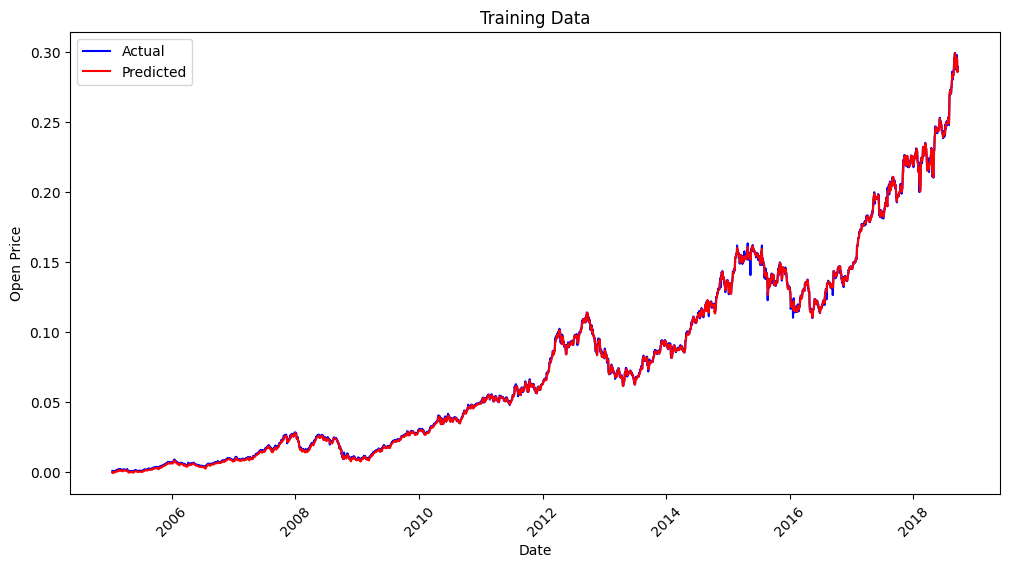

In [81]:
# Plot the training data with dates
plt.figure(figsize=(12, 6))
plt.plot(train_dates_1, y_train, label='Actual', color='blue')
plt.plot(train_dates_1, predictions_train_1, label='Predicted', color='red')
plt.title('Training Data')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()


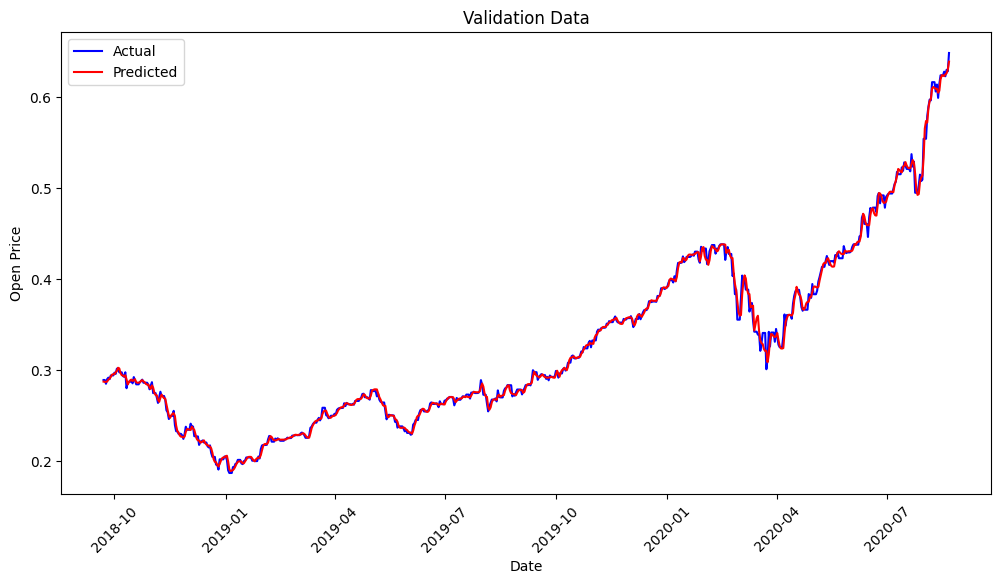

In [82]:

# Plot the validation data with dates
plt.figure(figsize=(12, 6))
plt.plot(val_dates_1, y_val, label='Actual', color='blue')
plt.plot(val_dates_1, predictions_val_1, label='Predicted', color='red')
plt.title('Validation Data')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()


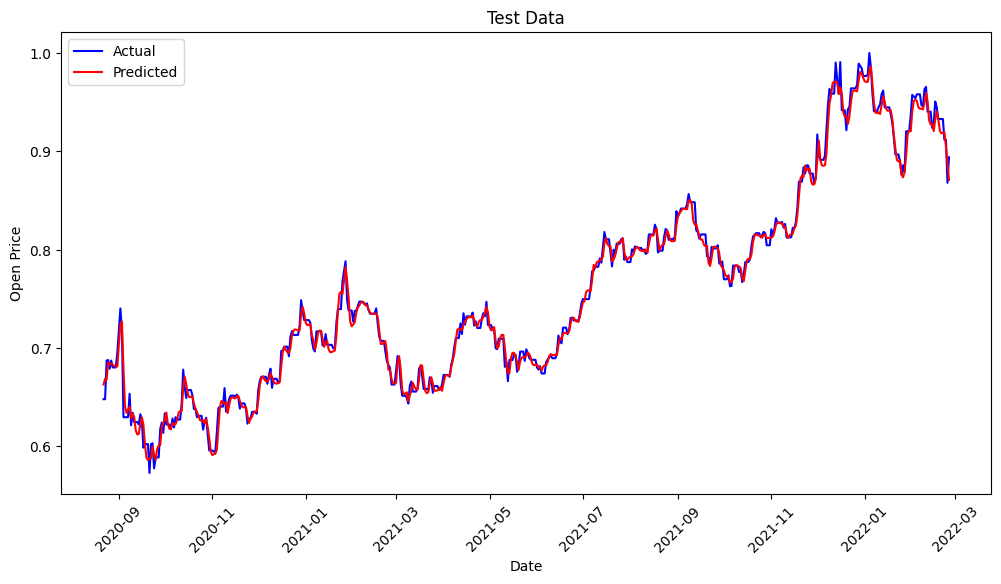

In [83]:

# Plot the test data with dates for the bset_model_1 trained on Multi input and Single Output Data
plt.figure(figsize=(12, 6))
plt.plot(test_dates_1, y_test, label='Actual', color='blue')
plt.plot(test_dates_1, predictions_test_1, label='Predicted', color='red')
plt.title('Test Data')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

We will now train teh multi input multi output LSTM

In [32]:
# Trainfig the Multi Inpput Multi Output LSTM
# Define the input dimensions, hidden dimensions, and number of layers
input_dim = 5  # Number of features (Open, High, Low, Close, Volume)
hidden_dim = 64  # Number of units in the hidden layer
num_layers = 4 # Number of LSTM layers
output_dim = 5  # Output dimension (for multi-output, set to the number of features)

# Create an instance of the modified LSTM model
model = MultiInputMultiOutputLSTM(input_dim, hidden_dim, num_layers, output_dim)

# Move the model to the appropriate device (CPU or GPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# Print the model architecture
print(model)

MultiInputMultiOutputLSTM(
  (lstm): LSTM(5, 64, num_layers=4, batch_first=True)
  (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=64, out_features=5, bias=True)
)


In [33]:
# prepoare a datafraeme with a large lookback of 30 days
Xm, ym = multi_input_multi_output_data(daily_data_normalized_df,30)
Xm.shape, ym.shape
Xm_train, ym_train = Xm[:5000], ym[:5000]
Xm_val, ym_val = Xm[5000:5700], ym[5000:5700]
Xm_test, ym_test = Xm[5700:], ym[5700:]
Xm_train.shape, ym_train.shape, Xm_val.shape, ym_val.shape, Xm_test.shape, ym_test.shape

Xm_train_df = pd.DataFrame(Xm_train[0])
Xm_val_df = pd.DataFrame(Xm_val[0])
Xm_test_df = pd.DataFrame(Xm_test[0])

# Convert NumPy arrays to PyTorch tensors
Xm_train = torch.tensor(Xm_train).float()
ym_train = torch.tensor(ym_train).float()
Xm_val = torch.tensor(Xm_val).float()
ym_val = torch.tensor(ym_val).float()
Xm_test = torch.tensor(Xm_test).float()
ym_test = torch.tensor(ym_test).float()

In [34]:
train_dataset_m = TensorDataset(Xm_train, ym_train)
val_dataset_m = TensorDataset(Xm_val, ym_val)
test_dataset_m = TensorDataset(Xm_test, ym_test)

# Define batch size
batch_size = 128

# Create DataLoader objects
train_loader_m = DataLoader(train_dataset_m, batch_size=batch_size, shuffle=True)
val_loader_m = DataLoader(val_dataset_m, batch_size=batch_size, shuffle=False)
test_loader_m = DataLoader(test_dataset_m, batch_size=batch_size, shuffle=False)

In [35]:
# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

In [70]:
# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()
learning_rate = 0.001

# Define the optimizer (Adam)
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the number of epochs
num_epochs = 100

# Create lists to store training and validation losses
train_losses = []
val_losses = []

# Move the model to the selected device
model.to(device)
best_val_loss = float('inf')  # Initialize with a large value

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Initialize the running loss
    running_train_loss = 0.0

    # Iterate through the training dataset
    for inputs, labels in train_loader_m:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_train_loss += loss.item()

    # Calculate the average training loss for this epoch
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0

    with torch.no_grad():  # Disable gradient computation during validation
        for inputs, labels in val_loader_m:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Calculate the loss
            loss = criterion(outputs, labels)

            # Update the running loss
            running_val_loss += loss.item()

    # Calculate the average validation loss for this epoch
    avg_val_loss = running_val_loss / len(val_loader)

    # Check if this is the best model so far
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

        # Save the current best model
        torch.save(model.state_dict(), 'best_model_2.pth')

    val_losses.append(avg_val_loss)

    # Print the training and validation loss for this epoch
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# After training, you can load the best model for testing
best_model_2 = MultiInputMultiOutputLSTM(input_dim, hidden_dim, num_layers, output_dim)
best_model_2.load_state_dict(torch.load('best_model_2.pth'))
best_model_2.eval()  # Set the model to evaluation mode for testing


Epoch [1/100] - Train Loss: 0.0005, Val Loss: 0.0002
Epoch [2/100] - Train Loss: 0.0005, Val Loss: 0.0537
Epoch [3/100] - Train Loss: 0.0005, Val Loss: 0.0008
Epoch [4/100] - Train Loss: 0.0005, Val Loss: 0.0016
Epoch [5/100] - Train Loss: 0.0005, Val Loss: 0.0035
Epoch [6/100] - Train Loss: 0.0005, Val Loss: 0.0037
Epoch [7/100] - Train Loss: 0.0004, Val Loss: 0.0012
Epoch [8/100] - Train Loss: 0.0004, Val Loss: 0.0045
Epoch [9/100] - Train Loss: 0.0004, Val Loss: 0.0083
Epoch [10/100] - Train Loss: 0.0005, Val Loss: 0.0027
Epoch [11/100] - Train Loss: 0.0005, Val Loss: 0.0005
Epoch [12/100] - Train Loss: 0.0005, Val Loss: 0.0032
Epoch [13/100] - Train Loss: 0.0005, Val Loss: 0.0057
Epoch [14/100] - Train Loss: 0.0004, Val Loss: 0.0020
Epoch [15/100] - Train Loss: 0.0005, Val Loss: 0.0032
Epoch [16/100] - Train Loss: 0.0004, Val Loss: 0.0042
Epoch [17/100] - Train Loss: 0.0005, Val Loss: 0.0004
Epoch [18/100] - Train Loss: 0.0004, Val Loss: 0.0010
Epoch [19/100] - Train Loss: 0.0005, 

MultiInputMultiOutputLSTM(
  (lstm): LSTM(5, 64, num_layers=4, batch_first=True)
  (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=64, out_features=5, bias=True)
)

In [36]:

# After training, you can load the best model for testing
best_model_2 = MultiInputMultiOutputLSTM(input_dim, hidden_dim, num_layers, output_dim)
best_model_2.load_state_dict(torch.load('best_model_2.pth'))
best_model_2.eval()  # Set the model to evaluation mode for testing

# Testing loop
best_model_2.to(device)
test_loss = 0.0

with torch.no_grad():  # Disable gradient computation during testing
    for inputs, labels in test_loader_m:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = best_model_2(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Update the test loss
        test_loss += loss.item()

# Calculate the average test loss
avg_test_loss = test_loss / len(test_loader)

print(f"Test Loss: {avg_test_loss:.4f}")

Test Loss: 0.0005


In [84]:

Xm_train = Xm_train.to(device)
Xm_val = Xm_val.to(device)
Xm_test = Xm_test.to(device)

# Predict on the training, validation, and test sets
with torch.no_grad():
    predictions_train_2 = best_model_2(Xm_train).cpu().numpy()
    predictions_val_2 = best_model_2(Xm_val).cpu().numpy()
    predictions_test_2 = best_model_2(Xm_test).cpu().numpy()


In [38]:
# Slice the dates corresponding to the train set
train_dates_2 = daily_data_normalized_df.index[30:5030]

# Slice the dates corresponding to the validation set
val_dates_2 = daily_data_normalized_df.index[5030:5730]

# Slice the dates corresponding to the test set
test_dates_2 = daily_data_normalized_df.index[5730:]

ym_train_np = ym_train.cpu().numpy()
ym_val_np= ym_val.cpu().numpy()
ym_test_np = ym_test.cpu().numpy()


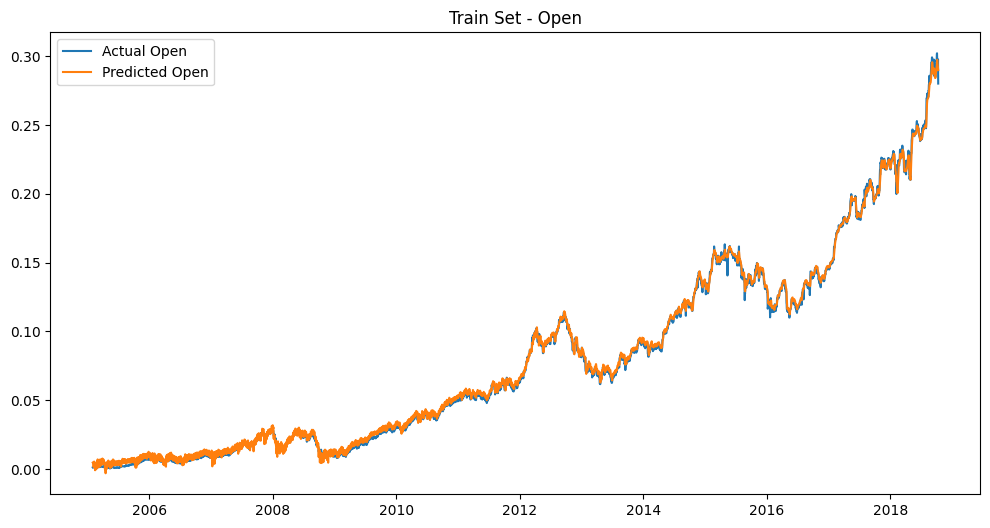

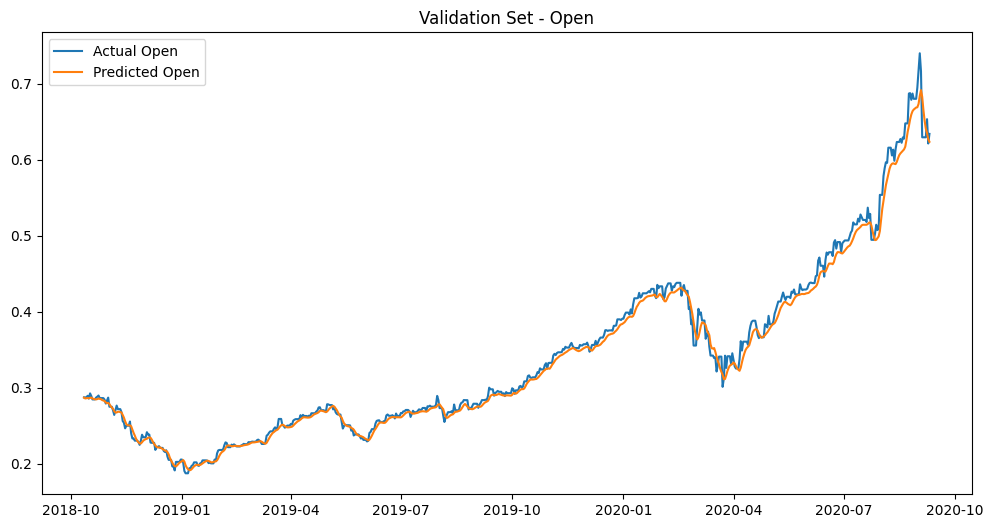

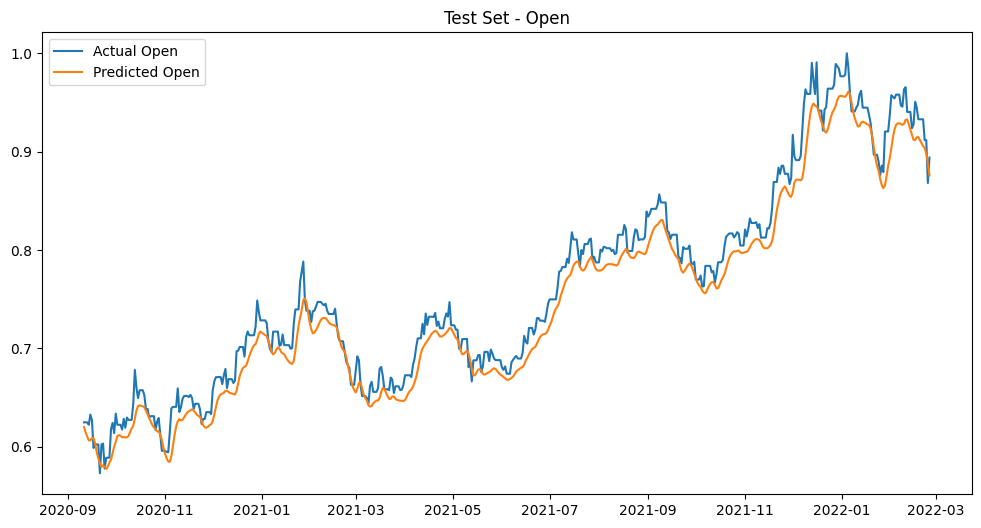

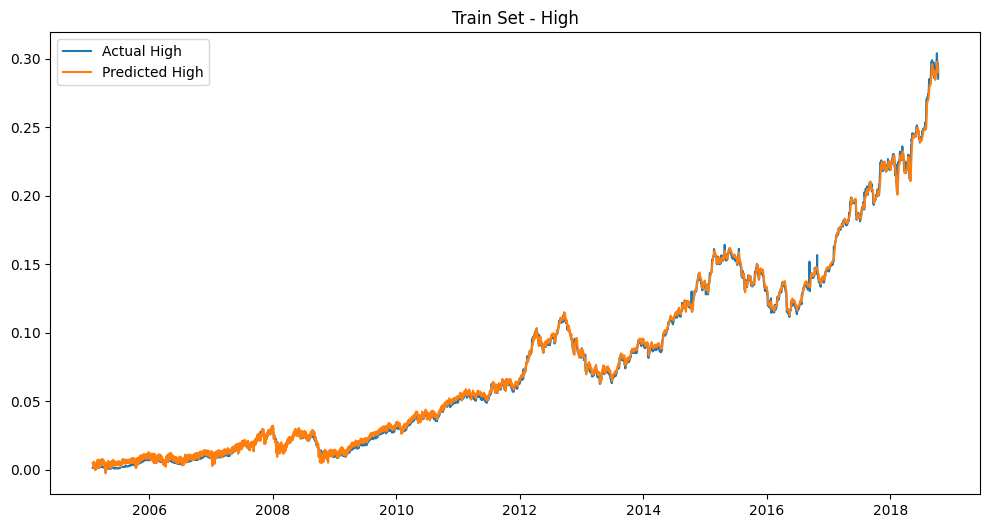

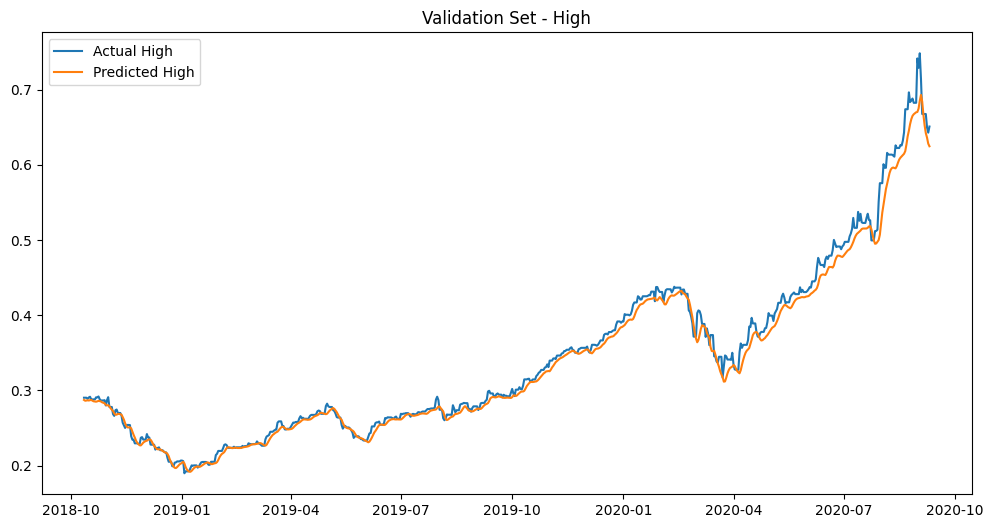

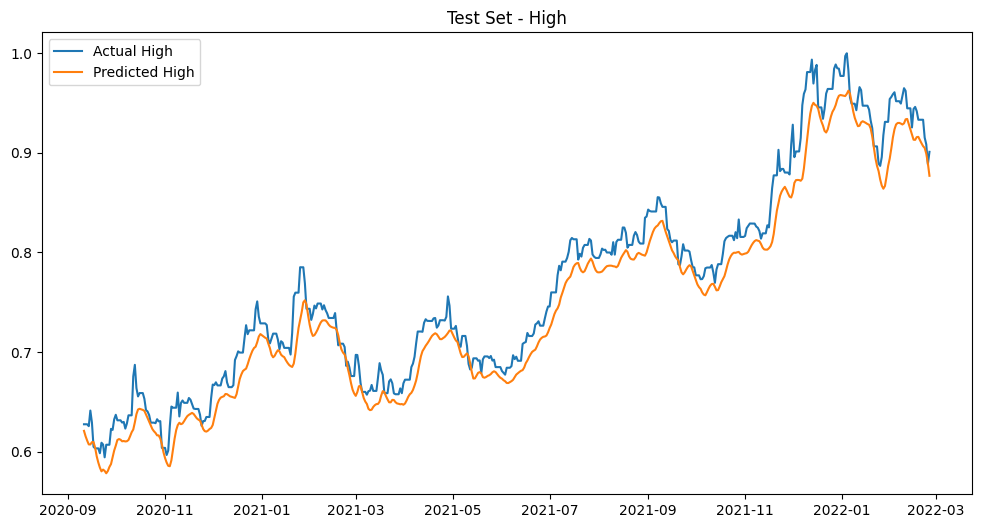

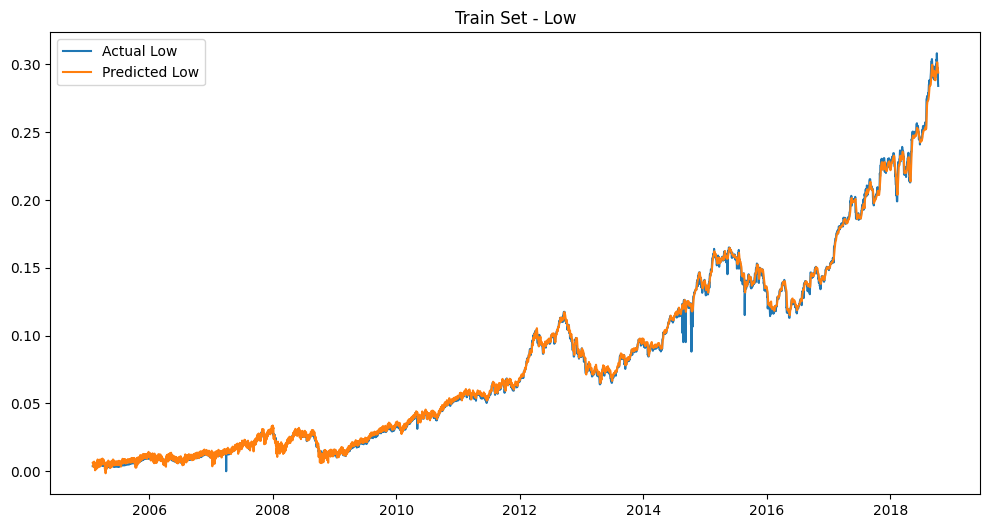

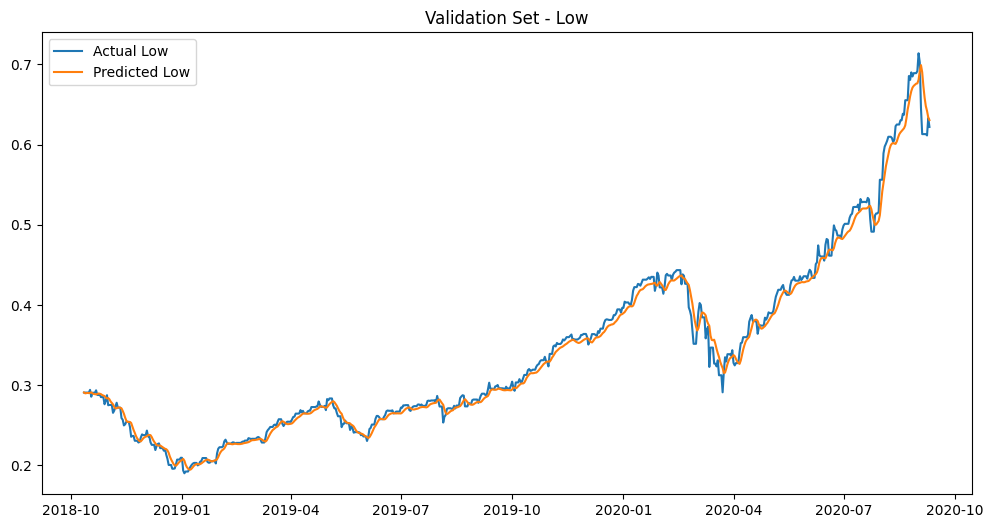

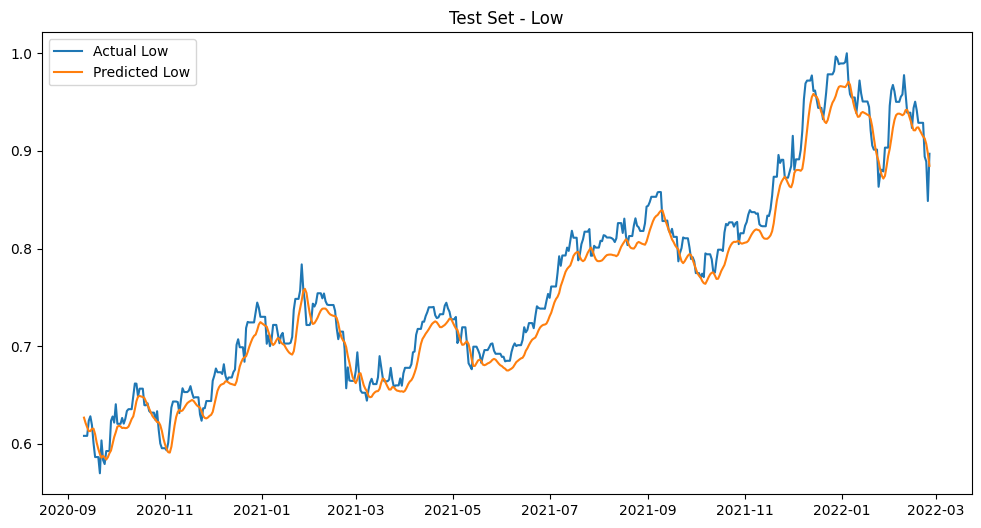

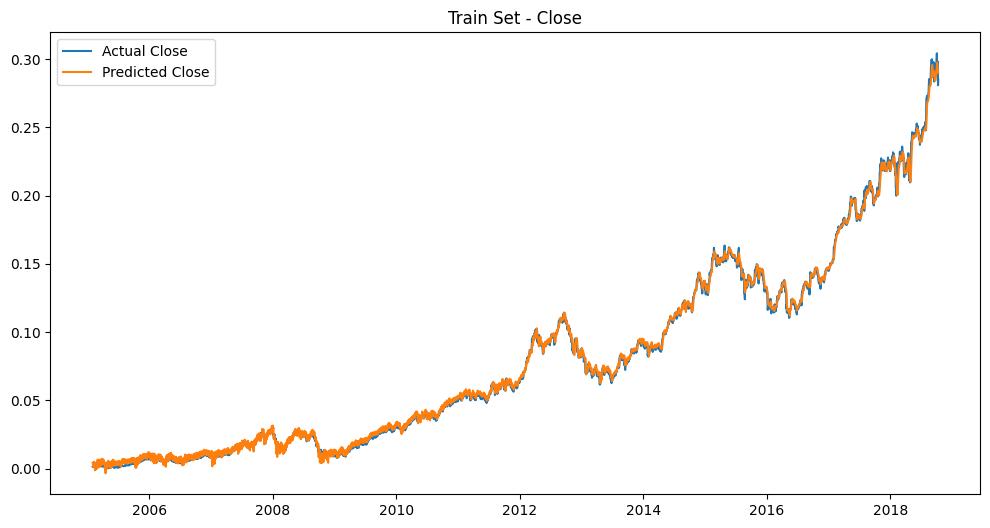

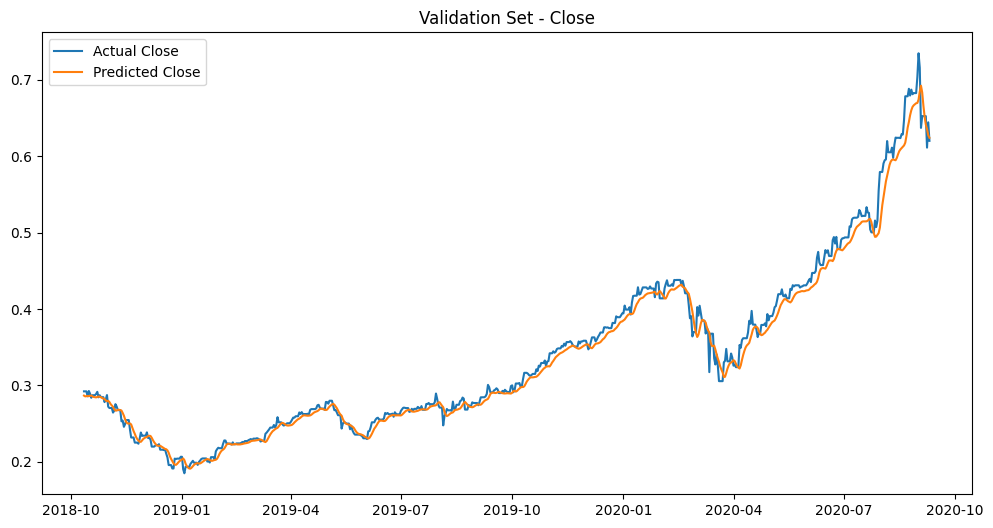

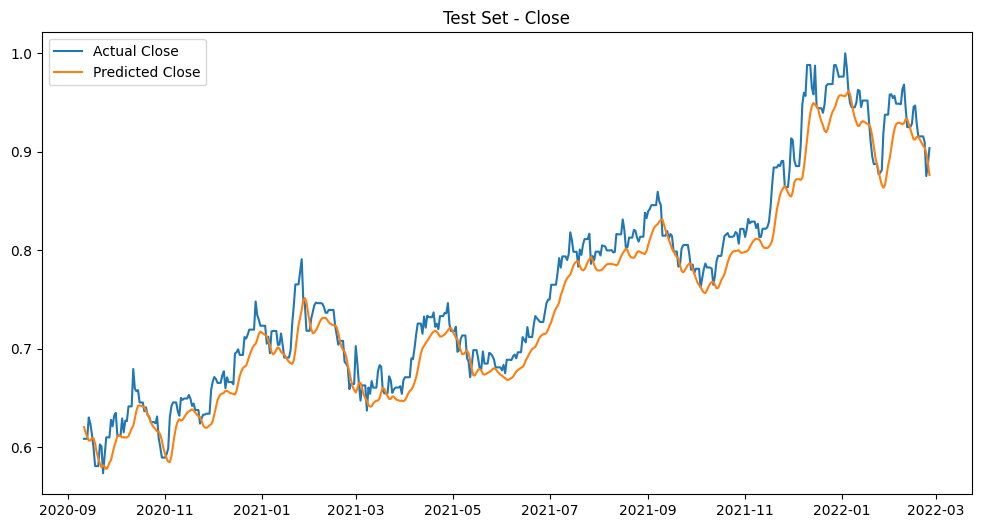

In [39]:
for feature_index in range(4):
    feature_name = ['Open', 'High', 'Low', 'Close'][feature_index]

    # Create subplots for train, validation, and test sets
    plt.figure(figsize=(12, 6))
    #plt.subplot(3, 1, 1)
    plt.plot(train_dates_2, ym_train_np[:, feature_index], label=f'Actual {feature_name}')
    plt.plot(train_dates_2, predictions_train_2[:, feature_index], label=f'Predicted {feature_name}')
    plt.title(f'Train Set - {feature_name}')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    #plt.subplot(3, 1, 2)
    plt.plot(val_dates_2, ym_val_np[:, feature_index], label=f'Actual {feature_name}')
    plt.plot(val_dates_2, predictions_val_2[:, feature_index], label=f'Predicted {feature_name}')
    plt.title(f'Validation Set - {feature_name}')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    #plt.subplot(3, 1, 3)
    plt.plot(test_dates_2, ym_test_np[:, feature_index], label=f'Actual {feature_name}')
    plt.plot(test_dates_2, predictions_test_2[:, feature_index], label=f'Predicted {feature_name}')
    plt.title(f'Test Set - {feature_name}')
    plt.legend()

    #plt.tight_layout()
    plt.show()

7. Set up a trading module that will make some hard-coded logical decisions to buy, hold, sell (in any order, because in shorting you can sell first and buy later). [2]


In [61]:
class Portfolio:
    def __init__(self, cash, initial_holdings=None):
        """
        Initialize the portfolio.

        Args:
            cash (float): Available cash for trading.
            initial_holdings (dict, optional): Initial stock holdings. Defaults to None.
        """
        self.cash = cash
        self.holdings = initial_holdings or {}  # A dictionary to store the number of shares for each stock

    def buy_stock(self, stock, num_shares, price):
        """
        Buy a stock and update the portfolio.

        Args:
            stock (str): Stock symbol (e.g., 'AAPL').
            num_shares (int): Number of shares to buy.
            price (float): Price per share.

        Returns:
            None
        """
        cost = num_shares * price

        # Check if there is enough cash to buy
        if cost <= self.cash:
            if stock in self.holdings:
                self.holdings[stock] += num_shares
            else:
                self.holdings[stock] = num_shares
            self.cash -= cost

    def sell_stock(self, stock, num_shares, price):
        """
        Sell a stock and update the portfolio.

        Args:
            stock (str): Stock symbol (e.g., 'AAPL').
            num_shares (int): Number of shares to sell.
            price (float): Price per share.

        Returns:
            None
        """
        if stock in self.holdings and self.holdings[stock] >= num_shares:
            earnings = num_shares * price
            self.holdings[stock] -= num_shares
            self.cash += earnings

    def make_trading_decision(self, model, current_date, test_dates, X_test, bid_ask_spread=0.005, commission_percentage=0.005):
        """
        Make a trading decision for a given date using the model's predictions, considering bid-ask spread and commission.

        Args:
            model: Trained LSTM model.
            current_date (str): Current date for which the prediction is needed.
            test_dates (pd.DatetimeIndex): Dates corresponding to the test data.
            X_test (np.ndarray): Test feature data.
            bid_ask_spread (float): Bid-ask spread as a percentage (e.g., 0.01 for 1% spread).
            commission_percentage (float): Commission as a percentage of the trade value (e.g., 0.01 for 1% commission).

        Returns:
            None
        """
        # Find the index of the current date in test_dates
        current_date_index = np.where(test_dates == current_date)[0][0]

        # Extract the feature data for the current date
        current_features = X_test[current_date_index, :, :].reshape(1, -1, 5)

        # Use the model to predict the price for the next day
        predicted_price = model(current_features).item()

        # Get the actual price for today from the first row of the feature data
        current_price = current_features[0, -1, 0]  # Assuming the price is in the first column

        # Desired profit and loss thresholds (2% higher or lower)
        profit_threshold = 0.005  # 2% higher
        loss_threshold = 0.005   # 2% lower

        # Calculate the buy and sell thresholds based on bid-ask spread and commission
        buy_threshold = current_price * (1 + bid_ask_spread + commission_percentage + profit_threshold)
        sell_threshold = current_price * (1 - bid_ask_spread - commission_percentage - loss_threshold)

        # Implement your decision logic here based on predicted_price, current_price, thresholds, etc.
        # Example decision logic:
        if predicted_price > buy_threshold:  # Buy if predicted price is above the buy threshold
            stock_to_buy = "AAPL"  # Replace with the stock symbol you want to buy
            self.buy_stock(stock_to_buy, num_shares=10, price=current_price)  # Buy 10 shares
        elif predicted_price < sell_threshold:  # Sell if predicted price is below the sell threshold
            stock_to_sell = "AAPL"  # Replace with the stock symbol you want to sell
            self.sell_stock(stock_to_sell, num_shares=10, price=current_price)  # Sell 10 shares
        else:
            # Hold if neither buy nor sell conditions are met
            pass

8. Test the trading system on the latest years on which the model was not trained. [3]

a) Does the price prediction error increase as you go further from the last time on which it
was trained?

b) Can you profitably trade with the bid-ask spread and commissions taken into account?

c) How does your profitability compare to a simple buy-and-hold strategy over long term (e.g.
one or two years)?

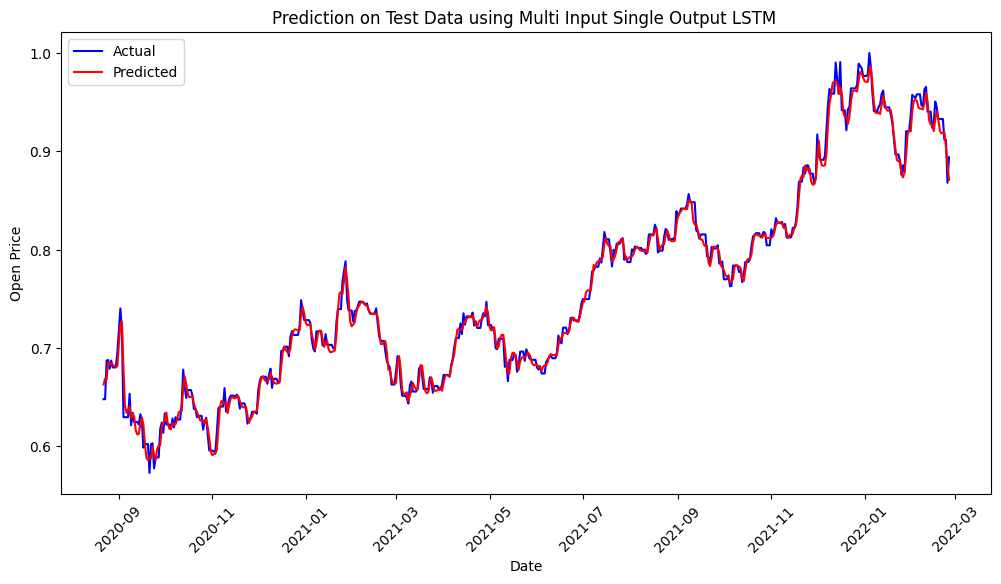

In [86]:
# Plot the test data with dates for the bset_model_1 trained on Multi input and Single Output Data
plt.figure(figsize=(12, 6))
plt.plot(test_dates_1, y_test, label='Actual', color='blue')
plt.plot(test_dates_1, predictions_test_1, label='Predicted', color='red')
plt.title('Prediction on Test Data using Multi Input Single Output LSTM ')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

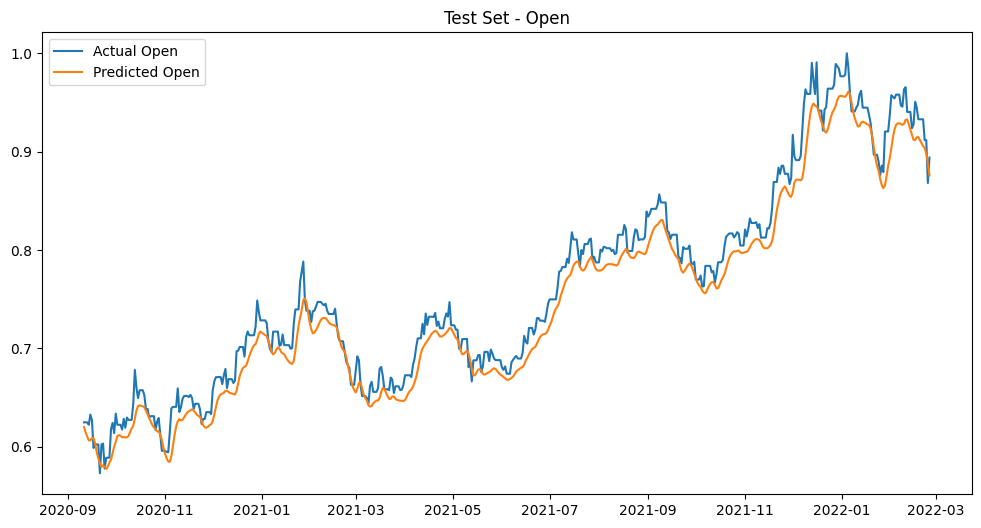

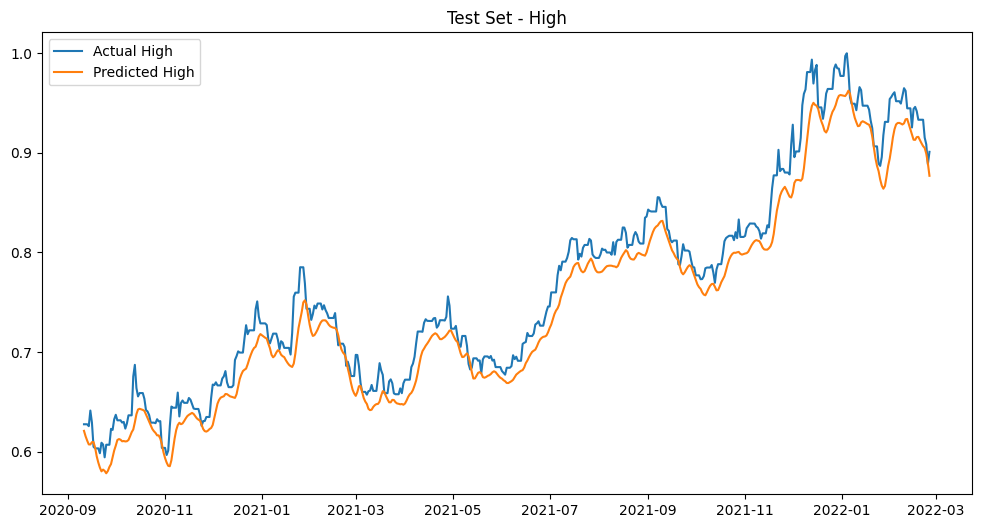

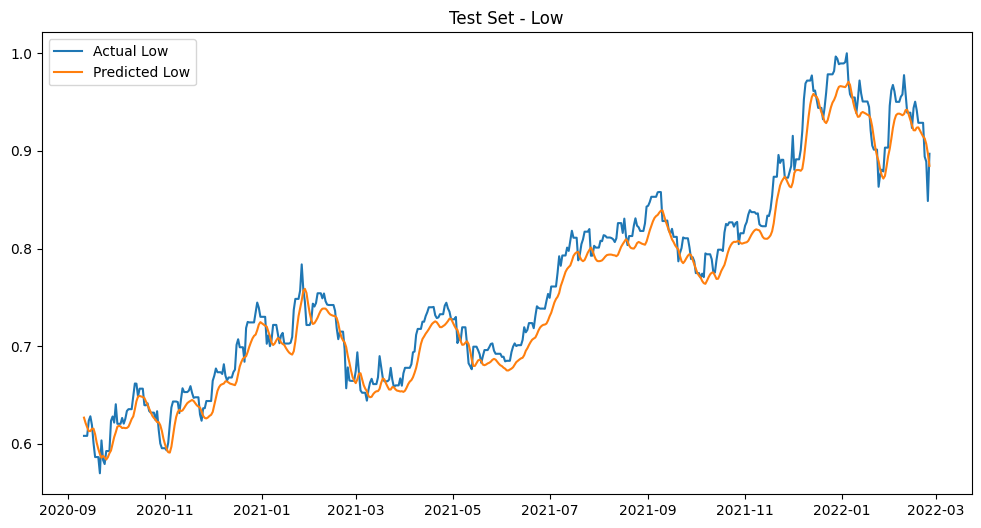

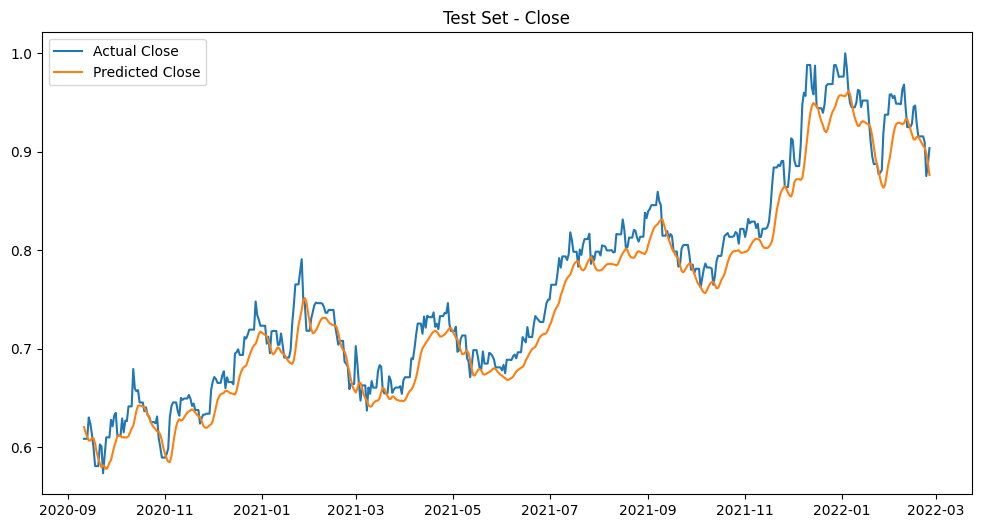

In [87]:
#predicitiosn using Multi Input & Multi Output LSTM
for feature_index in range(4):
    feature_name = ['Open', 'High', 'Low', 'Close'][feature_index]

    plt.figure(figsize=(12, 6))
    plt.plot(test_dates_2, ym_test_np[:, feature_index], label=f'Actual {feature_name}')
    plt.plot(test_dates_2, predictions_test_2[:, feature_index], label=f'Predicted {feature_name}')
    plt.title(f'Test Set - {feature_name}')
    plt.legend()

    plt.show()

It can be observed that as we go awya frmo the last training date, while the predictions follow the trend in the actual data, the predictions fomr the model dont exactly match the actual data.


To perform a trade using the model predictinos we can use the previously defoned modeule as

In [75]:
initial_cash = 10000
initial_holdings = {'AAPL': 100}  # Example initial holdings of 100 shares of AAPL
portfolio = Portfolio(cash=initial_cash, initial_holdings=initial_holdings)

In [76]:
# Access the current cash balance of the portfolio
current_cash_balance = portfolio.cash
print(f"Current Cash Balance: ${current_cash_balance:.2f}")

# Access the current holdings of the portfolio
current_holdings = portfolio.holdings
print("Current Holdings:")
for stock, num_shares in current_holdings.items():
    print(f"{stock}: {num_shares} shares")

Current Cash Balance: $10000.00
Current Holdings:
AAPL: 100 shares


In [77]:
current_date = "2021-02-26"  # Replace with the date you want to trade on

# Call the make_trading_decision method to make a trading decision for that date
portfolio.make_trading_decision(best_model_1, current_date, test_dates_1, X_test)


In [78]:
# Access the current cash balance of the portfolio
current_cash_balance = portfolio.cash
print(f"Current Cash Balance: ${current_cash_balance:.2f}")

# Access the current holdings of the portfolio
current_holdings = portfolio.holdings
print("Current Holdings:")
for stock, num_shares in current_holdings.items():
    print(f"{stock}: {num_shares} shares")

Current Cash Balance: $10006.80
Current Holdings:
AAPL: 90 shares


10 stocks for AAPL where sold & the cash was added to balance where as the number if sares wsa reduced yto 90.

Since the mdoel predicted the prices to fall, a fixed number of shares in the portflio was sold. The margins also take inyo account the commision & bid-ask spread  & the profit margin.

Incase the predicted prices are not aboev or beliw the certain thershohld, the trading module decidesx to hold on to the shares in its portfolio instaed of buynig or selling.

9. Advanced: [2 bonus]
a) Can you now modify the model to use multiple stock prices as inputs to predict a single stock (your choice)? Does it improve predictions?


We begin by looking for stocks that have highly correlated stock prices

In [5]:
data_dir = '/content/drive/MyDrive/sp500_tickers_A-D_1min_1pppix'

# List the files in the data directory to see the available stock data files
stock_files = os.listdir(data_dir)

# Initialize an empty DataFrame to store the closing prices
closing_prices_df = pd.DataFrame()

# Specify the date range for aggregation
start_date = '2000-01-02'
end_date =  '2023-01-31'

# Aggregate and add the closing prices for each stock to the DataFrame
for stock_file in stock_files:
    stock_symbol = stock_file.split('_')[0]
    daily_data = aggregate_min_to_day(stock_symbol, start_date, end_date)
    if daily_data is not None and not daily_data.empty:
       closing_prices_df[stock_symbol] = daily_data['Close']

# Fill missing values with forward fill and then normalize the data
closing_prices_df.ffill(inplace=True)
normalized_closing_prices = (closing_prices_df - closing_prices_df.mean()) / closing_prices_df.std()

# Calculate the correlation matrix
correlation_matrix = normalized_closing_prices.corr()

# Display the correlation matrix
print(correlation_matrix)

<ipython-input-5-c6711069aee0>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closing_prices_df[stock_symbol] = daily_data['Close']
<ipython-input-5-c6711069aee0>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closing_prices_df[stock_symbol] = daily_data['Close']
<ipython-input-5-c6711069aee0>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-

ParserError: ignored

In [7]:
closing_prices_df

,AAL,AAPL,AA,AAP,ABBV,ABT,ABC,ABMD,ACN,ACV,...,CHD,CHK,CHRW,CHTR,CIEN,CINF,CIT,CI,CLF,CLX
Timestamp,,,,,,,,,,,,,,,,,,,,,
2013-12-09,23.2386,17.9492,NaN,103.4330,36.3711,31.6558,61.9018,27.88,64.7978,NaN,...,29.6499,NaN,47.6322,128.1860,23.25,40.5915,41.7571,85.4319,22.9428,77.1929
2013-12-10,23.4743,17.9492,NaN,105.8014,37.2731,31.6217,61.1481,27.40,65.0393,NaN,...,29.2732,NaN,47.3713,131.7760,23.45,40.4205,41.1701,84.4026,22.9610,76.1694
2013-12-11,24.5113,17.7736,NaN,103.4814,37.4294,31.1786,60.2979,26.60,64.1596,NaN,...,29.3087,NaN,47.0742,130.8200,23.00,39.9387,40.8889,83.4517,21.8767,76.2419
2013-12-12,24.1813,17.7388,NaN,104.3320,37.2163,31.0593,60.2716,26.60,63.8922,NaN,...,29.0206,NaN,46.8256,131.6500,21.40,39.8920,40.9468,82.6184,21.7310,75.2023
2013-12-13,24.6527,17.5585,NaN,105.8594,37.1737,31.0167,59.9912,26.70,63.9181,NaN,...,29.1447,NaN,46.5520,133.2970,21.84,40.1329,40.6739,81.6087,21.3118,75.1539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-22,17.5600,165.4500,74.40,206.7600,145.6000,117.5500,140.5600,296.64,321.1100,25.50,...,96.7200,67.70,92.3700,597.2484,69.87,123.9400,NaN,227.7300,19.3900,148.5000
2022-02-23,16.5500,159.2100,75.55,195.0000,146.4000,117.2500,139.4700,290.68,313.1600,24.87,...,96.3000,69.70,92.4200,575.5684,67.30,122.4400,NaN,225.0900,18.5700,147.5400


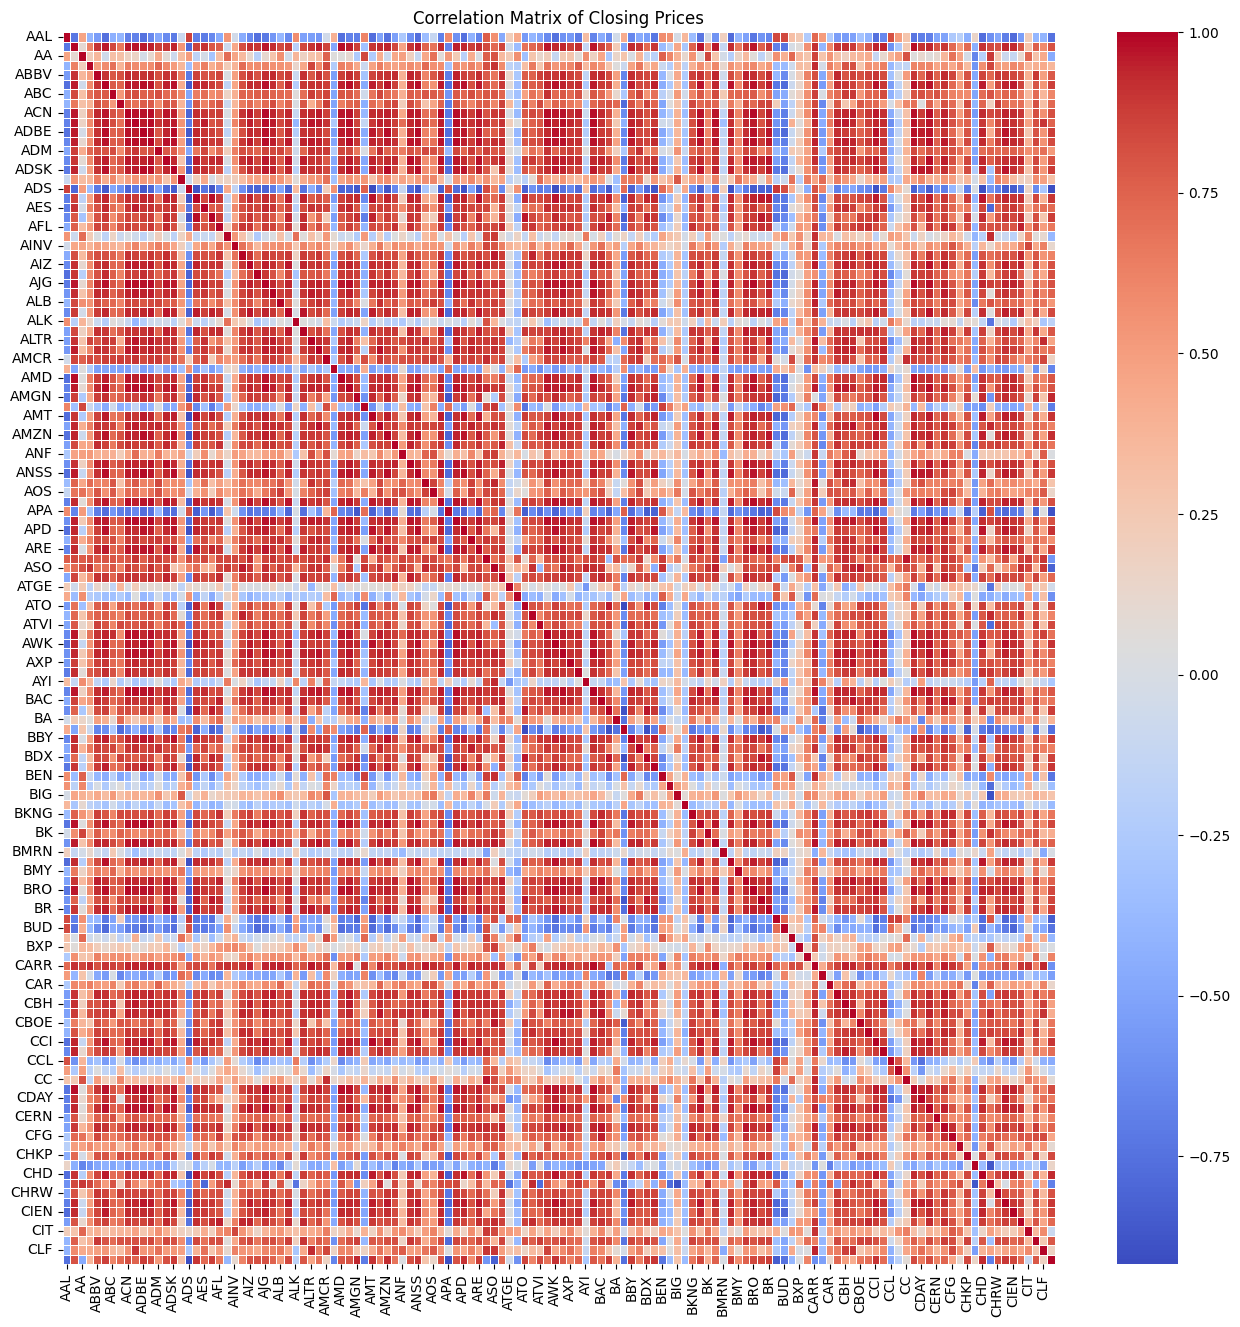

In [14]:
# Fill missing values with forward fill and then normalize the data
closing_prices_df.ffill(inplace=True)
normalized_closing_prices = (closing_prices_df - closing_prices_df.mean()) / closing_prices_df.std()

# Calculate the correlation matrix
correlation_matrix = normalized_closing_prices.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Closing Prices')
plt.show()

In [15]:
top_correlated_stocks = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(5)

In [16]:
# these are highly correlated stocks
top_correlated_stocks

AAL  AAL     1.000000
AJG  BRO     0.990404
ACN  AJG     0.988721
BIO  ADBE    0.987728
AON  CDW     0.987139
dtype: float64

In [20]:
# we will now use the below highly correlated stocks ot train LSTM to predict one of the them
# AAL, AJG, ACN, BRO, BIO

daily_data_AAL = aggregate_min_to_day('AAL', '2000-01-02', '2023-01-31')
daily_data_AJG = aggregate_min_to_day('AJG', '2000-01-02', '2023-01-31')
daily_data_ACN = aggregate_min_to_day('ACN', '2000-01-02', '2023-01-31')
daily_data_BRO = aggregate_min_to_day('BRO', '2000-01-02', '2023-01-31')
daily_data_BIO = aggregate_min_to_day('BIO', '2000-01-02', '2023-01-31')

In [27]:
# Extract the 'Close' columns for each stock
close_AAL = daily_data_AAL[['Close']].rename(columns={'Close': 'AAL_Close'})
close_AJG = daily_data_AJG[['Close']].rename(columns={'Close': 'AJG_Close'})
close_ACN = daily_data_ACN[['Close']].rename(columns={'Close': 'ACN_Close'})
close_BRO = daily_data_BRO[['Close']].rename(columns={'Close': 'BRO_Close'})
close_BIO = daily_data_BIO[['Close']].rename(columns={'Close': 'BIO_Close'})

# Merge the 'Close' columns into a single DataFrame
closing_prices_df = pd.concat([close_AAL, close_AJG, close_ACN, close_BRO, close_BIO], axis=1)

# Display the resulting DataFrame
print(closing_prices_df)

            AAL_Close  AJG_Close  ACN_Close  BRO_Close  BIO_Close
Timestamp                                                        
2005-01-03        NaN    17.9813        NaN        NaN        NaN
2005-01-04        NaN    17.5961        NaN        NaN        NaN
2005-01-05        NaN    17.5026        NaN        NaN        NaN
2005-01-06        NaN    17.5741        NaN        NaN        NaN
2005-01-07        NaN    17.4145        NaN        NaN        NaN
...               ...        ...        ...        ...        ...
2022-02-21        NaN        NaN        NaN        NaN        NaN
2022-02-22      17.56   153.7300     321.11      65.68     582.88
2022-02-23      16.55   151.6800     313.16      64.23     572.42
2022-02-24      16.75   154.4200     316.17      66.15     598.43
2022-02-25      17.49   159.3000     322.51      67.59     641.29

[6263 rows x 5 columns]


In [28]:
# any missing values in the data can be filled before applying normaliasation
closing_prices_df.fillna(method='bfill', inplace=True)
closing_prices_df

,AAL_Close,AJG_Close,ACN_Close,BRO_Close,BIO_Close
Timestamp,,,,,
2005-01-03,23.2386,17.9813,29.6717,11.6663,69.08
2005-01-04,23.2386,17.5961,29.6717,11.6663,69.08
2005-01-05,23.2386,17.5026,29.6717,11.6663,69.08
2005-01-06,23.2386,17.5741,29.6717,11.6663,69.08
2005-01-07,23.2386,17.4145,29.6717,11.6663,69.08
...,...,...,...,...,...
2022-02-21,17.5600,153.7300,321.1100,65.6800,582.88
2022-02-22,17.5600,153.7300,321.1100,65.6800,582.88
2022-02-23,16.5500,151.6800,313.1600,64.2300,572.42


In [29]:
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
closing_prices_df_norm = scaler.fit_transform(closing_prices_df)

# Convert the normalized array back to a DataFrame
closing_prices_df_norm = pd.DataFrame(data=closing_prices_df_norm, columns=closing_prices_df.columns, index=closing_prices_df.index)

# Print the first few rows of the normalized DataFrame
print(closing_prices_df_norm.tail())

            AAL_Close  AJG_Close  ACN_Close  BRO_Close  BIO_Close
Timestamp                                                        
2022-02-21   0.179474   0.895922   0.758901   0.852592   0.685738
2022-02-22   0.179474   0.895922   0.758901   0.852592   0.685738
2022-02-23   0.158445   0.883154   0.738470   0.831647   0.672204
2022-02-24   0.162609   0.900220   0.746205   0.859381   0.705857
2022-02-25   0.178017   0.930615   0.762499   0.880181   0.761311


In [32]:
#prepare the data for lstm to predict the price of AAL from 5 input stocks
X, y = multi_input_single_output_data(closing_prices_df_norm,10)
X.shape, y.shape

((6253, 10, 5), (6253,))

In [33]:
X_train, y_train = X[:5000], y[:5000]
X_val, y_val = X[5000:5700], y[5000:5700]
X_test, y_test = X[5700:], y[5700:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5000, 10, 5), (5000,), (700, 10, 5), (700,), (553, 10, 5), (553,))

In [34]:
X_train_df = pd.DataFrame(X_train[0])
X_val_df = pd.DataFrame(X_val[0])
X_test_df = pd.DataFrame(X_test[0])

# Display the DataFrames
print("X_train DataFrame:")
print(X_train_df)

print("X_val DataFrame:")
print(X_val_df)

print("X_test DataFrame:")
print(X_test_df)

X_train DataFrame:
          0         1         2         3        4
0  0.297706  0.050413  0.009916  0.072378  0.02096
1  0.297706  0.048014  0.009916  0.072378  0.02096
2  0.297706  0.047431  0.009916  0.072378  0.02096
3  0.297706  0.047877  0.009916  0.072378  0.02096
4  0.297706  0.046882  0.009916  0.072378  0.02096
5  0.297706  0.047325  0.009916  0.072378  0.02096
6  0.297706  0.047325  0.009916  0.072378  0.02096
7  0.297706  0.047325  0.009916  0.072378  0.02096
8  0.297706  0.046437  0.009916  0.072378  0.02096
9  0.297706  0.046334  0.009916  0.072378  0.02096
X_val DataFrame:
          0         1         2         3         4
0  0.615449  0.371770  0.349090  0.341239  0.327149
1  0.619944  0.378074  0.353284  0.343343  0.329504
2  0.625869  0.379665  0.352236  0.339557  0.331522
3  0.633225  0.381020  0.350772  0.332965  0.314508
4  0.633225  0.381020  0.350772  0.332965  0.314508
5  0.633225  0.381020  0.350772  0.332965  0.314508
6  0.649163  0.380490  0.354113  0.3291

In [35]:
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


In [36]:

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_val = torch.tensor(X_val).float()
y_val = torch.tensor(y_val).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

In [37]:
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Define batch size
batch_size = 64

# Create DataLoader objects
train_loader_3 = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader_3 = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader_3 = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [39]:
# We can begin by defining the input dimensions, hidden dimensions, and number of layers
input_dim = 5  # Number of features (Open, High, Low, Close, Volume)
hidden_dim = 64  # Number of units in the hidden layer
num_layers = 2  # Number of LSTM layers
output_dim = 1  # Output dimension

# Create an instance of the LSTM model
model = Multivar_LSTM(input_dim, hidden_dim, num_layers, output_dim)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# Print the model architecture
print(model)

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()
learning_rate=0.001
# Define the optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


Multivar_LSTM(
  (lstm): LSTM(5, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


In [42]:

# we can now run the train, test & validation loops
# Define the number of epochs
num_epochs = 100

# Create lists to store training and validation losses
train_losses = []
val_losses = []

# Move the model to the selected device
model.to(device)
best_val_loss = float('inf')  # Initialize with a large value

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Initialize the running loss
    running_train_loss = 0.0

    # Iterate through the training dataset
    for inputs, labels in train_loader_3:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_train_loss += loss.item()

    # Calculate the average training loss for this epoch
    avg_train_loss = running_train_loss / len(train_loader_3)
    train_losses.append(avg_train_loss)

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0

    with torch.no_grad():  # Disable gradient computation during validation
        for inputs, labels in val_loader_3:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Calculate the loss
            loss = criterion(outputs, labels)

            # Update the running loss
            running_val_loss += loss.item()

    # Calculate the average validation loss for this epoch
    avg_val_loss = running_val_loss / len(val_loader_3)

    # Check if this is the best model so far
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

        # Save the current best model
        torch.save(model.state_dict(), 'best_model_1.pth')

    val_losses.append(avg_val_loss)

    # Print the training and validation loss for this epoch
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")


Epoch [1/100] - Train Loss: 0.0012, Val Loss: 0.0093
Epoch [2/100] - Train Loss: 0.0005, Val Loss: 0.0044
Epoch [3/100] - Train Loss: 0.0005, Val Loss: 0.0017
Epoch [4/100] - Train Loss: 0.0005, Val Loss: 0.0021
Epoch [5/100] - Train Loss: 0.0004, Val Loss: 0.0013
Epoch [6/100] - Train Loss: 0.0004, Val Loss: 0.0011
Epoch [7/100] - Train Loss: 0.0004, Val Loss: 0.0012
Epoch [8/100] - Train Loss: 0.0004, Val Loss: 0.0012
Epoch [9/100] - Train Loss: 0.0004, Val Loss: 0.0010
Epoch [10/100] - Train Loss: 0.0004, Val Loss: 0.0009
Epoch [11/100] - Train Loss: 0.0003, Val Loss: 0.0011
Epoch [12/100] - Train Loss: 0.0004, Val Loss: 0.0010
Epoch [13/100] - Train Loss: 0.0003, Val Loss: 0.0011
Epoch [14/100] - Train Loss: 0.0003, Val Loss: 0.0010
Epoch [15/100] - Train Loss: 0.0003, Val Loss: 0.0010
Epoch [16/100] - Train Loss: 0.0003, Val Loss: 0.0011
Epoch [17/100] - Train Loss: 0.0003, Val Loss: 0.0014
Epoch [18/100] - Train Loss: 0.0003, Val Loss: 0.0009
Epoch [19/100] - Train Loss: 0.0003, 

In [44]:
# testing & plot for the ist model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_train = X_train.to(device)
X_val = X_val.to(device)
X_test = X_test.to(device)

# After training, you can load the best model for testing
best_model_1 = Multivar_LSTM(input_dim, hidden_dim, num_layers, output_dim)
best_model_1.load_state_dict(torch.load('best_model_1.pth'))
best_model_1.eval()  # Set the model to evaluation mode for testing
best_model_1.to(device)

# Testing loop
test_loss = 0.0

with torch.no_grad():  # Disable gradient computation during testing
    for inputs, labels in test_loader_3:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = best_model_1(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Update the test loss
        test_loss += loss.item()

# Calculate the average test loss
avg_test_loss = test_loss / len(test_loader_3)

print(f"Test Loss: {avg_test_loss:.4f}")
# Predictions on the training, validation, and test sets
with torch.no_grad():
    predictions_train_1 = best_model_1(X_train).cpu().numpy()
    predictions_val_1 = best_model_1(X_val).cpu().numpy()
    predictions_test_1 = best_model_1(X_test).cpu().numpy()
# brign the target tensors backto cpu & convert to numpy for plotting
y_train_np = y_train.cpu().numpy()
y_val_np= y_val.cpu().numpy()
y_test_np = y_test.cpu().numpy()

# Now we can plot the targets and predictions for the differnt cases

Test Loss: 0.0004


The results for the same are plotted below

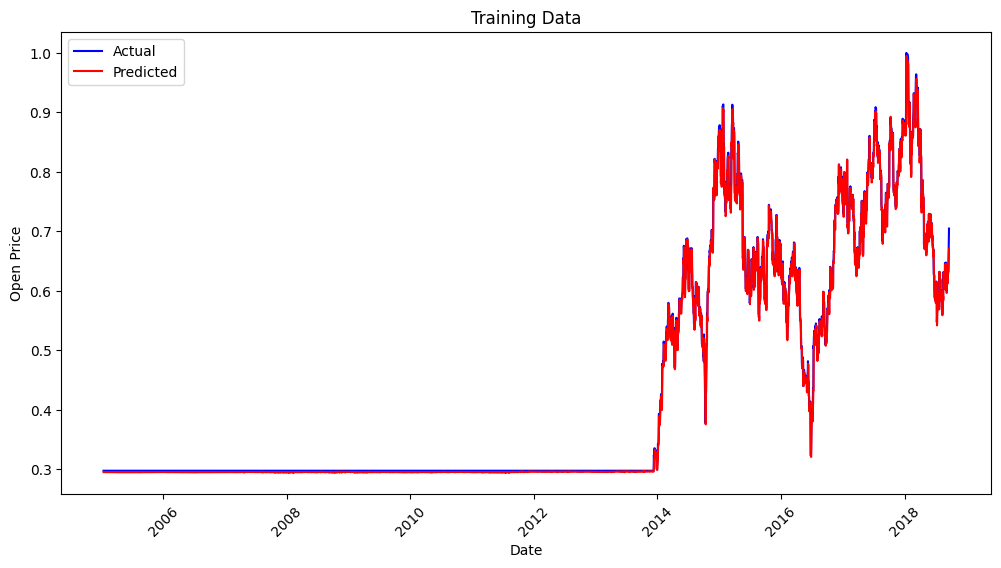

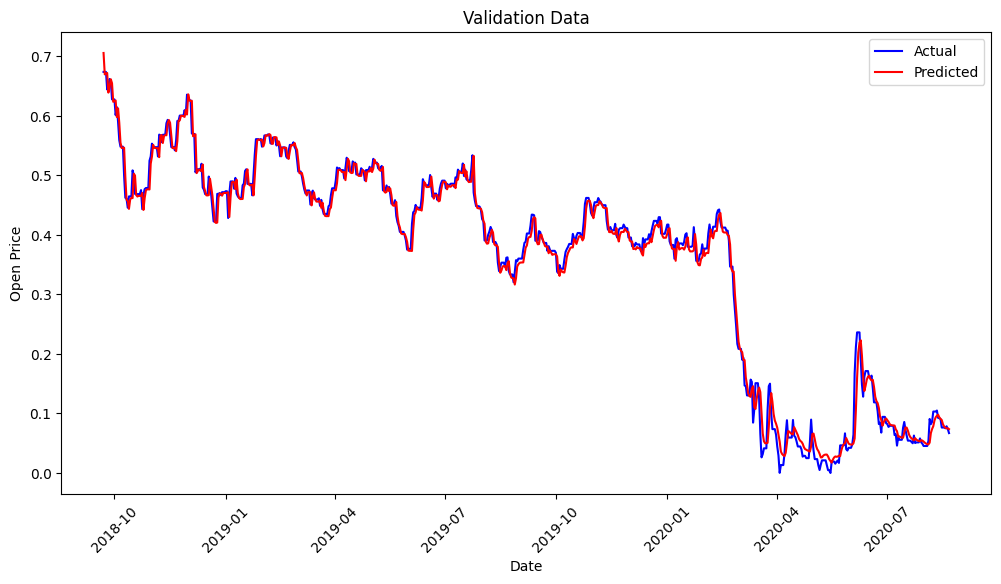

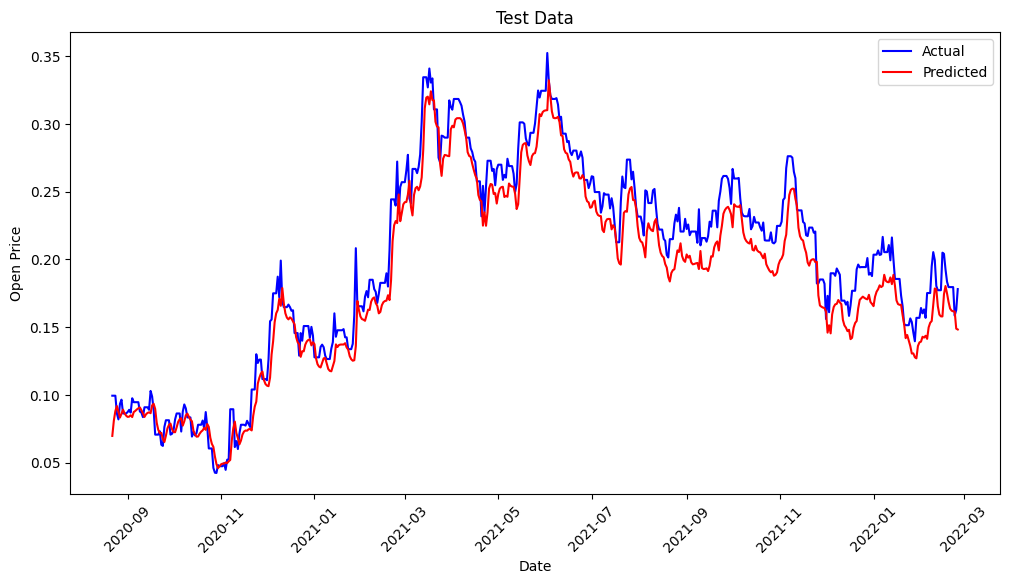

In [45]:
# Slice the dates corresponding to the train set
train_dates_1 = closing_prices_df.index[10:5010]

# Slice the dates corresponding to the validation set
val_dates_1 = closing_prices_df.index[5010:5710]

# Slice the dates corresponding to the test set
test_dates_1 = closing_prices_df.index[5710:]
# Plot the training data with dates
plt.figure(figsize=(12, 6))
plt.plot(train_dates_1, y_train, label='Actual', color='blue')
plt.plot(train_dates_1, predictions_train_1, label='Predicted', color='red')
plt.title('Training Data')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

# Plot the validation data with dates
plt.figure(figsize=(12, 6))
plt.plot(val_dates_1, y_val, label='Actual', color='blue')
plt.plot(val_dates_1, predictions_val_1, label='Predicted', color='red')
plt.title('Validation Data')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

# Plot the test data with dates for the bset_model_1 trained on Multi input and Single Output Data
plt.figure(figsize=(12, 6))
plt.plot(test_dates_1, y_test, label='Actual', color='blue')
plt.plot(test_dates_1, predictions_test_1, label='Predicted', color='red')
plt.title('Test Data')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

b) Can you add day of the week, day in year, and time as inputs? Does it improve results?

We can now add day of the week & day of the year as sines & cosines to the dataframe. since i am using daily data, i will not be encoding time of the day as asine & cosine


In [46]:
# Encode day of the week and day of the year with sine and cosine functions
closing_prices_df['DayOfWeek_sin'] = np.sin(2 * np.pi * closing_prices_df.index.dayofweek / 7)
closing_prices_df['DayOfWeek_cos'] = np.cos(2 * np.pi * closing_prices_df.index.dayofweek / 7)
closing_prices_df['DayOfYear_sin'] = np.sin(2 * np.pi * closing_prices_df.index.dayofyear / 365)
closing_prices_df['DayOfYear_cos'] = np.cos(2 * np.pi * closing_prices_df.index.dayofyear / 365)

# Display the updated DataFrame
print(closing_prices_df)

            AAL_Close  AJG_Close  ACN_Close  BRO_Close  BIO_Close  \
Timestamp                                                           
2005-01-03    23.2386    17.9813    29.6717    11.6663      69.08   
2005-01-04    23.2386    17.5961    29.6717    11.6663      69.08   
2005-01-05    23.2386    17.5026    29.6717    11.6663      69.08   
2005-01-06    23.2386    17.5741    29.6717    11.6663      69.08   
2005-01-07    23.2386    17.4145    29.6717    11.6663      69.08   
...               ...        ...        ...        ...        ...   
2022-02-21    17.5600   153.7300   321.1100    65.6800     582.88   
2022-02-22    17.5600   153.7300   321.1100    65.6800     582.88   
2022-02-23    16.5500   151.6800   313.1600    64.2300     572.42   
2022-02-24    16.7500   154.4200   316.1700    66.1500     598.43   
2022-02-25    17.4900   159.3000   322.5100    67.5900     641.29   

            DayOfWeek_sin  DayOfWeek_cos  DayOfYear_sin  DayOfYear_cos  
Timestamp                    

In [47]:
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
closing_prices_df_norm = scaler.fit_transform(closing_prices_df)

# Convert the normalized array back to a DataFrame
closing_prices_df_norm = pd.DataFrame(data=closing_prices_df_norm, columns=closing_prices_df.columns, index=closing_prices_df.index)

# Print the first few rows of the normalized DataFrame
print(closing_prices_df_norm.tail())
X, y = multi_input_single_output_data(closing_prices_df_norm,10)
X.shape, y.shape
X_train, y_train = X[:5000], y[:5000]
X_val, y_val = X[5000:5700], y[5000:5700]
X_test, y_test = X[5700:], y[5700:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

            AAL_Close  AJG_Close  ACN_Close  BRO_Close  BIO_Close  \
Timestamp                                                           
2022-02-21   0.179474   0.895922   0.758901   0.852592   0.685738   
2022-02-22   0.179474   0.895922   0.758901   0.852592   0.685738   
2022-02-23   0.158445   0.883154   0.738470   0.831647   0.672204   
2022-02-24   0.162609   0.900220   0.746205   0.859381   0.705857   
2022-02-25   0.178017   0.930615   0.762499   0.880181   0.761311   

            DayOfWeek_sin  DayOfWeek_cos  DayOfYear_sin  DayOfYear_cos  
Timestamp                                                               
2022-02-21       0.500000   1.000000e+00       0.890152       0.812702  
2022-02-22       0.900969   8.019377e-01       0.895476       0.805940  
2022-02-23       1.000000   3.568959e-01       0.900684       0.799087  
2022-02-24       0.722521   5.551115e-17       0.905773       0.792145  
2022-02-25       0.277479   0.000000e+00       0.910742       0.785117  


((5000, 10, 9), (5000,), (700, 10, 9), (700,), (553, 10, 9), (553,))

In [48]:
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_val = torch.tensor(X_val).float()
y_val = torch.tensor(y_val).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Define batch size
batch_size = 64

# Create DataLoader objects
train_loader_4 = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader_4 = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader_4 = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [49]:
# We can begin by defining the input dimensions, hidden dimensions, and number of layers
input_dim = 9  # Number of features (Open, High, Low, Close, Volume, including week , year)
hidden_dim = 64  # Number of units in the hidden layer
num_layers = 2  # Number of LSTM layers
output_dim = 1  # Output dimension

# Create an instance of the LSTM model
model = Multivar_LSTM(input_dim, hidden_dim, num_layers, output_dim)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# Print the model architecture
print(model)

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()
learning_rate=0.001
# Define the optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


Multivar_LSTM(
  (lstm): LSTM(9, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


In [51]:

# we can now run the train, test & validation loops
# Define the number of epochs
num_epochs = 100

# Create lists to store training and validation losses
train_losses = []
val_losses = []

# Move the model to the selected device
model.to(device)
best_val_loss = float('inf')  # Initialize with a large value

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Initialize the running loss
    running_train_loss = 0.0

    # Iterate through the training dataset
    for inputs, labels in train_loader_4:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_train_loss += loss.item()

    # Calculate the average training loss for this epoch
    avg_train_loss = running_train_loss / len(train_loader_4)
    train_losses.append(avg_train_loss)

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0

    with torch.no_grad():  # Disable gradient computation during validation
        for inputs, labels in val_loader_4:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Calculate the loss
            loss = criterion(outputs, labels)

            # Update the running loss
            running_val_loss += loss.item()

    # Calculate the average validation loss for this epoch
    avg_val_loss = running_val_loss / len(val_loader_4)

    # Check if this is the best model so far
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

        # Save the current best model
        torch.save(model.state_dict(), 'best_model_4.pth')

    val_losses.append(avg_val_loss)

    # Print the training and validation loss for this epoch
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")


Epoch [1/100] - Train Loss: 0.0334, Val Loss: 0.1942
Epoch [2/100] - Train Loss: 0.0021, Val Loss: 0.0471
Epoch [3/100] - Train Loss: 0.0007, Val Loss: 0.0061
Epoch [4/100] - Train Loss: 0.0005, Val Loss: 0.0040
Epoch [5/100] - Train Loss: 0.0005, Val Loss: 0.0033
Epoch [6/100] - Train Loss: 0.0004, Val Loss: 0.0028
Epoch [7/100] - Train Loss: 0.0004, Val Loss: 0.0025
Epoch [8/100] - Train Loss: 0.0004, Val Loss: 0.0022
Epoch [9/100] - Train Loss: 0.0004, Val Loss: 0.0019
Epoch [10/100] - Train Loss: 0.0004, Val Loss: 0.0021
Epoch [11/100] - Train Loss: 0.0004, Val Loss: 0.0016
Epoch [12/100] - Train Loss: 0.0004, Val Loss: 0.0027
Epoch [13/100] - Train Loss: 0.0004, Val Loss: 0.0023
Epoch [14/100] - Train Loss: 0.0004, Val Loss: 0.0013
Epoch [15/100] - Train Loss: 0.0004, Val Loss: 0.0015
Epoch [16/100] - Train Loss: 0.0004, Val Loss: 0.0018
Epoch [17/100] - Train Loss: 0.0003, Val Loss: 0.0020
Epoch [18/100] - Train Loss: 0.0003, Val Loss: 0.0024
Epoch [19/100] - Train Loss: 0.0003, 

In [53]:
# testing & plot for the ist model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_train = X_train.to(device)
X_val = X_val.to(device)
X_test = X_test.to(device)

# After training, you can load the best model for testing
best_model_4 = Multivar_LSTM(input_dim, hidden_dim, num_layers, output_dim)
best_model_4.load_state_dict(torch.load('best_model_4.pth'))
best_model_4.eval()  # Set the model to evaluation mode for testing
best_model_4.to(device)

# Testing loop
test_loss = 0.0

with torch.no_grad():  # Disable gradient computation during testing
    for inputs, labels in test_loader_4:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = best_model_4(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Update the test loss
        test_loss += loss.item()

# Calculate the average test loss
avg_test_loss = test_loss / len(test_loader_4)

print(f"Test Loss: {avg_test_loss:.4f}")
# Predictions on the training, validation, and test sets
with torch.no_grad():
    predictions_train_4 = best_model_4(X_train).cpu().numpy()
    predictions_val_4 = best_model_4(X_val).cpu().numpy()
    predictions_test_4 = best_model_4(X_test).cpu().numpy()
# brign the target tensors backto cpu & convert to numpy for plotting
y_train_np = y_train.cpu().numpy()
y_val_np= y_val.cpu().numpy()
y_test_np = y_test.cpu().numpy()

# Now we can plot the targets and predictions for the differnt cases

Test Loss: 0.0006


Below are the results plotted for the train test & val. The stock prices may not necessarily follow a periodic trend with respect to days of the week, year hence the performance does not improve much.

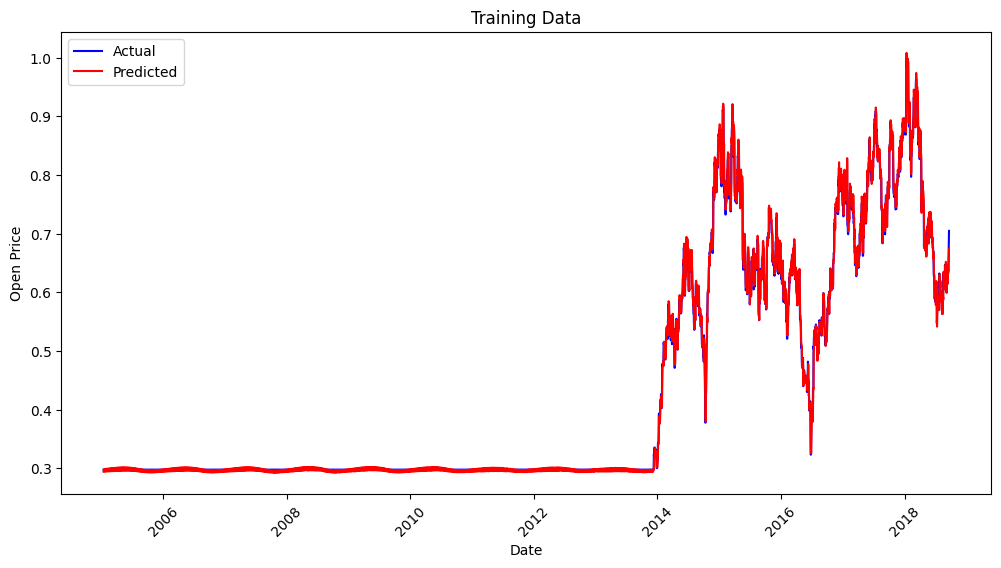

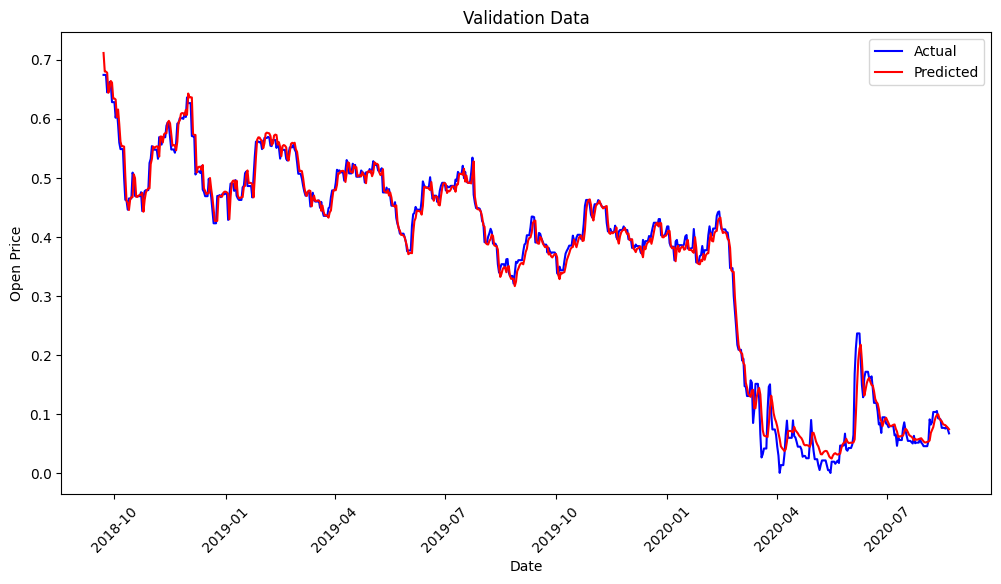

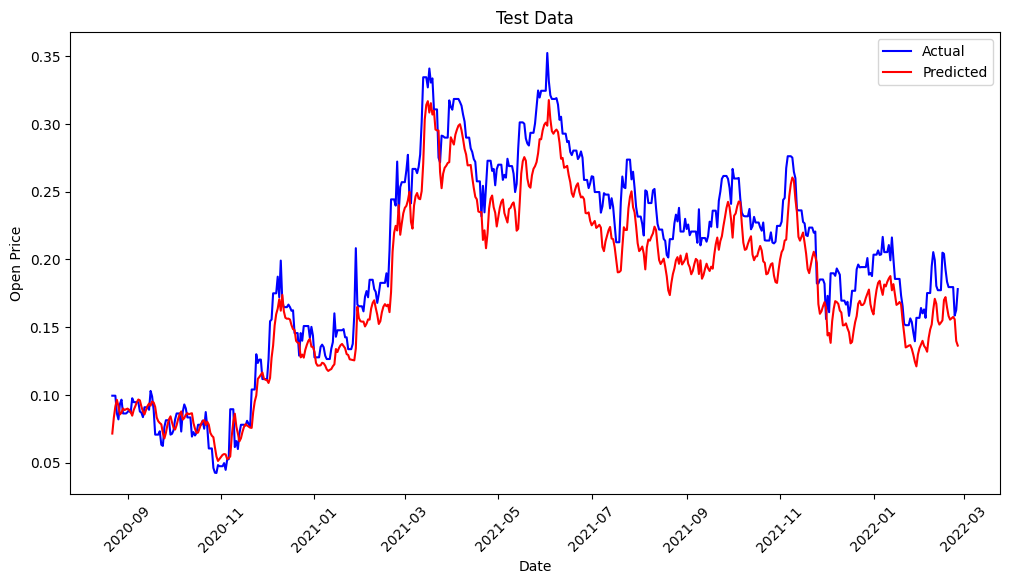

In [54]:
# Slice the dates corresponding to the train set
train_dates_1 = closing_prices_df.index[10:5010]

# Slice the dates corresponding to the validation set
val_dates_1 = closing_prices_df.index[5010:5710]

# Slice the dates corresponding to the test set
test_dates_1 = closing_prices_df.index[5710:]
# Plot the training data with dates
plt.figure(figsize=(12, 6))
plt.plot(train_dates_1, y_train, label='Actual', color='blue')
plt.plot(train_dates_1, predictions_train_4, label='Predicted', color='red')
plt.title('Training Data')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

# Plot the validation data with dates
plt.figure(figsize=(12, 6))
plt.plot(val_dates_1, y_val, label='Actual', color='blue')
plt.plot(val_dates_1, predictions_val_4, label='Predicted', color='red')
plt.title('Validation Data')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

# Plot the test data with dates for the bset_model_1 trained on Multi input and Single Output Data
plt.figure(figsize=(12, 6))
plt.plot(test_dates_1, y_test, label='Actual', color='blue')
plt.plot(test_dates_1, predictions_test_4, label='Predicted', color='red')
plt.title('Test Data')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

End with a cell that lists sources of starter code (e.g., github repo links, or chatGPT) for all modules.

Given below is the endless list of all the resources used for code & comments:
1. ChatGPT